In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<strong><h4>Description about columns</h4>
<ul>
    <li>Sex / nominal / -- / M, F, and I (infant) </li>
    <li>Length / continuous / mm / Longest shell measurement</li>
    <li>Diameter / continuous / mm / perpendicular to length</li>
    <li>Height / continuous / mm / with meat in shell</li>
    <li>Whole weight / continuous / grams / whole abalone</li>
    <li>Shucked weight / continuous / grams / weight of meat</li>
    <li>Viscera weight / continuous / grams / gut weight (after bleeding)</li>
    <li>Shell weight / continuous / grams / after being dried</li>
    <li>Rings / integer / -- / +1.5 gives the age in years. </li>
</ul>
    We need to predict the rings, so it is a regression problem as we are predicting an integer
</strong>

<h4>Checking for null Values</h4>

In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<strong>No Null values in our datset</strong>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<strong>There are a total of 4177 rows and 9 columns in our dataset. </strong>

<h3>Exploratory Data Analysis</h3>

<h4>Scatter Plots</h4>

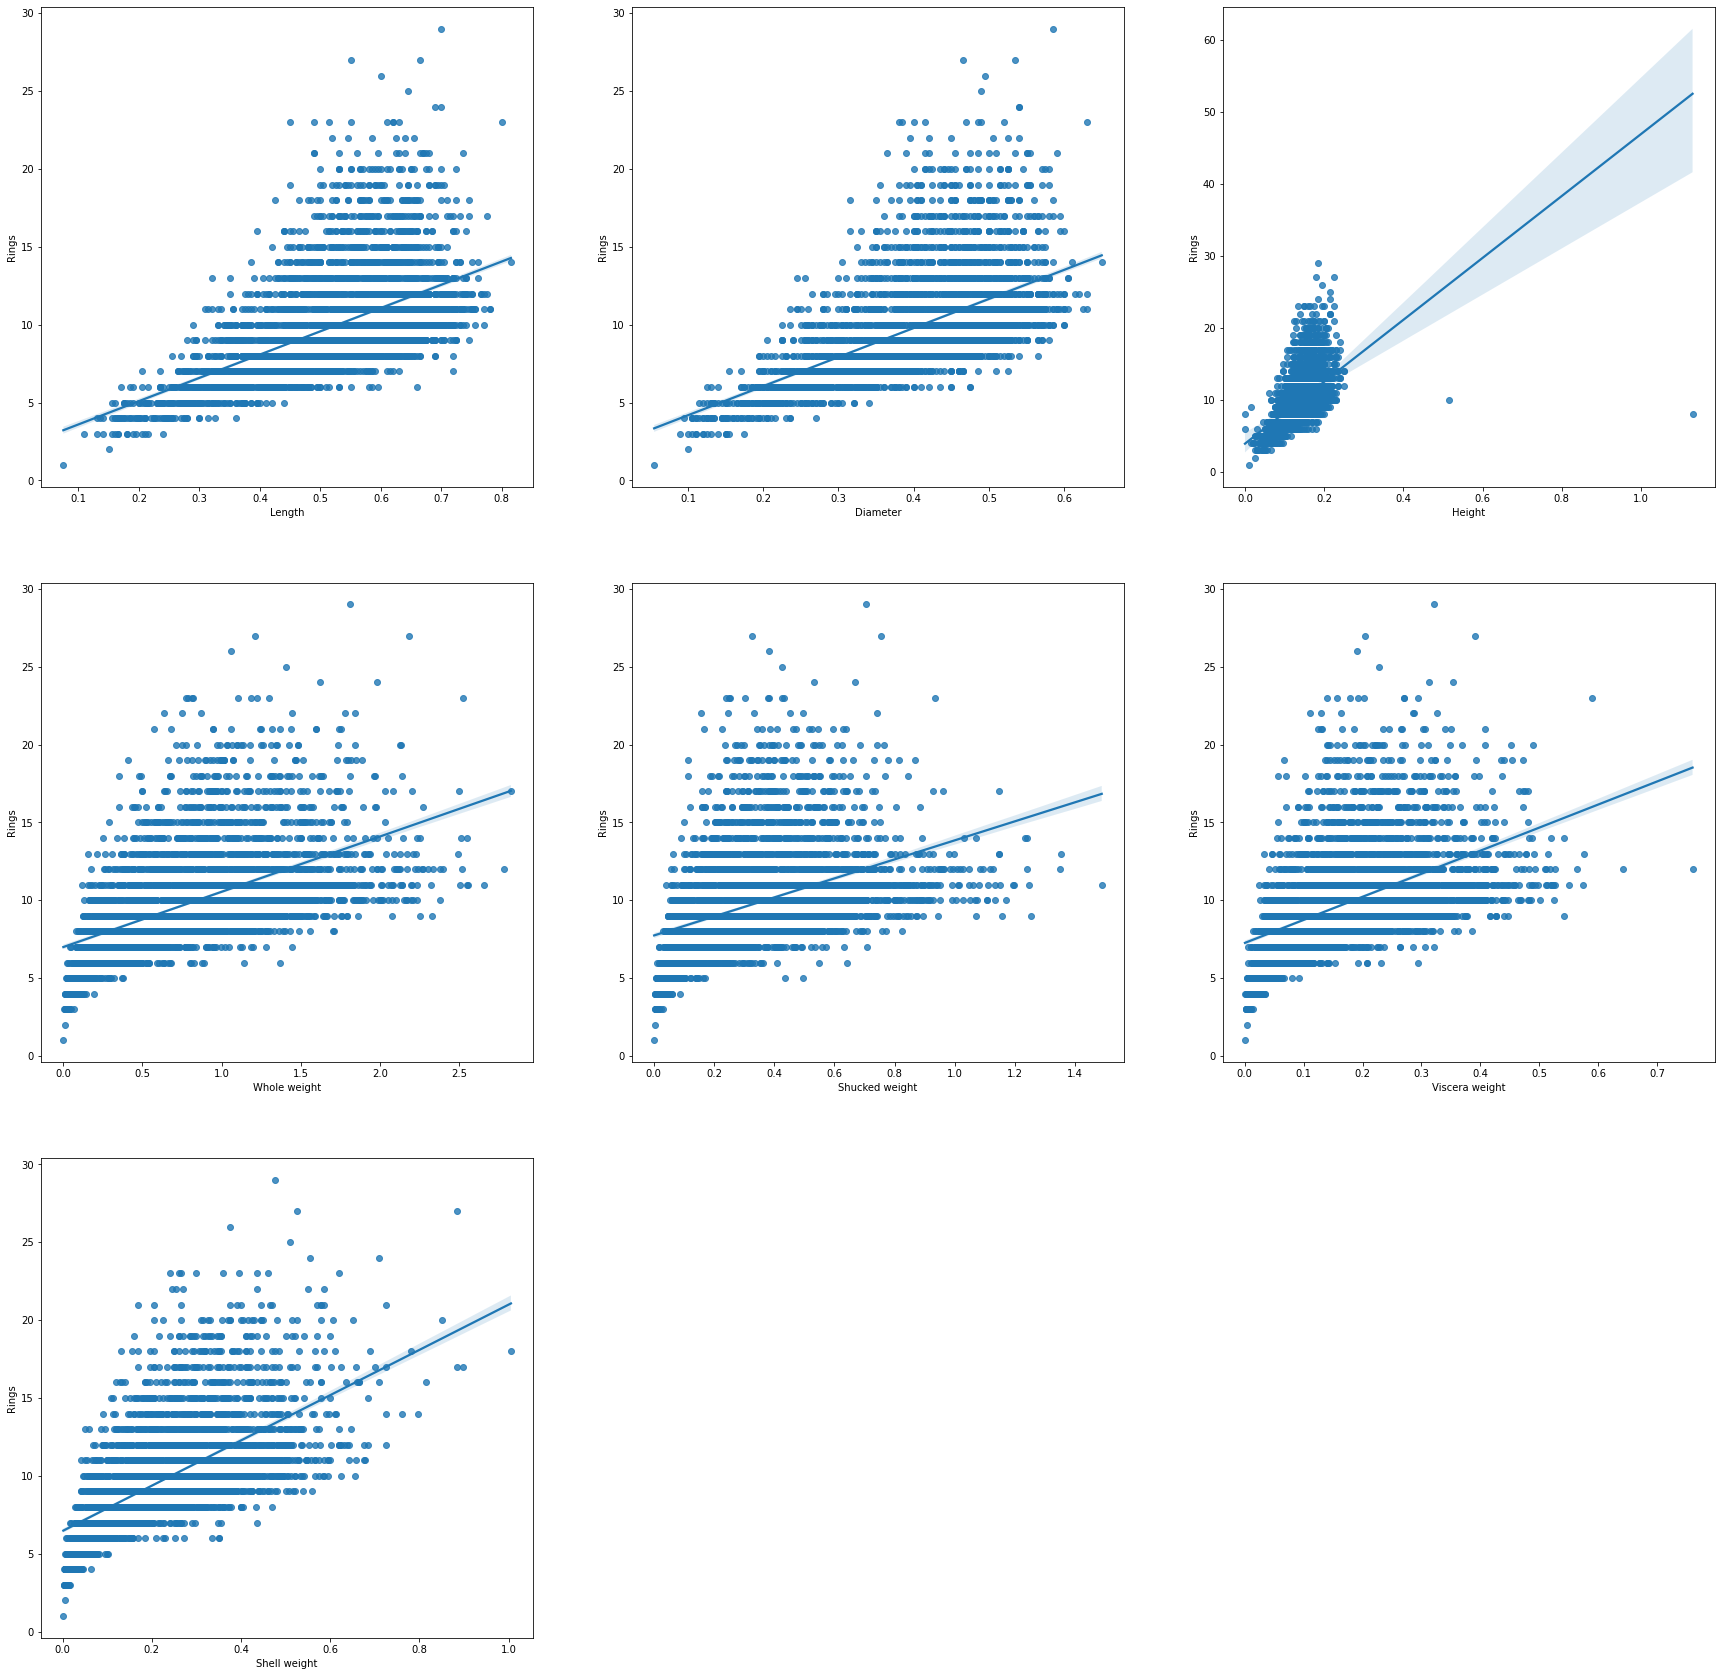

In [7]:
scatter_vars = data.drop(columns=['Sex', 'Rings']).columns.values
plt.figure(figsize=(30,30))
plotnumber=1
for i in scatter_vars:
    plt.subplot(3,3, plotnumber)
    sns.regplot(x=i, y='Rings', data=data)
    plotnumber+=1

<strong>
    <h3>Outcomes from ScatterPlots</h3>
    <ul>
        <li>Length follows an upward trend with the number of rings. The increase in length becomes very less after reaching age 15.</li>
        <li>Diameter follows an upward trend with number of rings. The increase in diameter becomes very less after reaching age 15.</li>
        <li>Height follows an upward trend with number of rings. There are outliers in height which have around 500% more than the average height and they do not follow this trend</li>
        <li>Whole weight follow an upward trend with number of rings. Below age 5 there is very less increase in whole weight. Between age 5 to 10 there is a dramatic increase in whole weight as age increases. After age 10 Whole weight has very less increase with increase in age.</li>
        <li>Shucked weight also follow a simliar trend as Whole weight. It follow an overall positive trend. Below age 5 there is very less increase in shucked weight as age increases. Between age 5 to 10 there is a dramamatic increase in shucked weight as age increases. After age 10 shucked weight increase very less as age increases.</li>
        <li>Viscera weight has an upwards trend with age. Below age 5 there is not much increase in viscera weight. The weight increase significantly between age 5 to 10 as the age increases. There is not much increase in viscera weight after age 10.</li>
        <li>Shell weight has very high upward trend with the age. Shell weight increase constatly as the age increases between age 4 to 12. After that there is sligh less increase in shell weight with respect to age</li>
    </ul>
</strong>

<h4>Stripplots</h4>

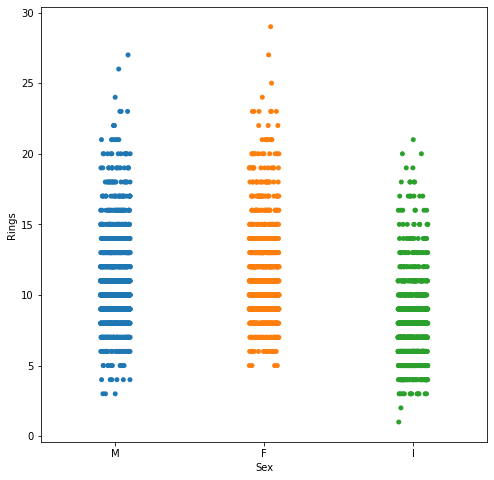

In [8]:
plt.figure(figsize=(8,8))
sns.stripplot(x='Sex', y='Rings', data=data)

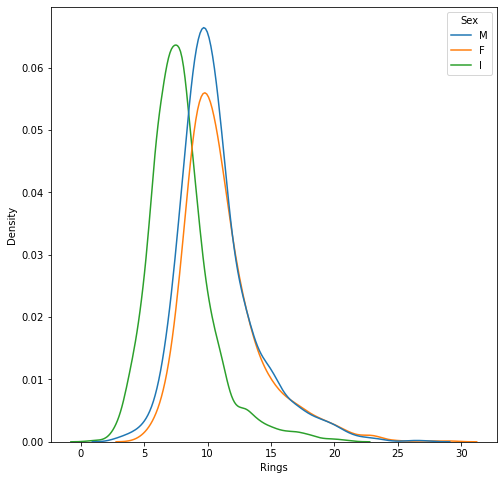

In [9]:
plt.figure(figsize=(8,8))
sns.kdeplot(x='Rings',hue='Sex', data=data)

<strong>We can see that females have generally highest no of rings, follows by males and then by infants</strong>

<h4>Count of different Sexes</h4>

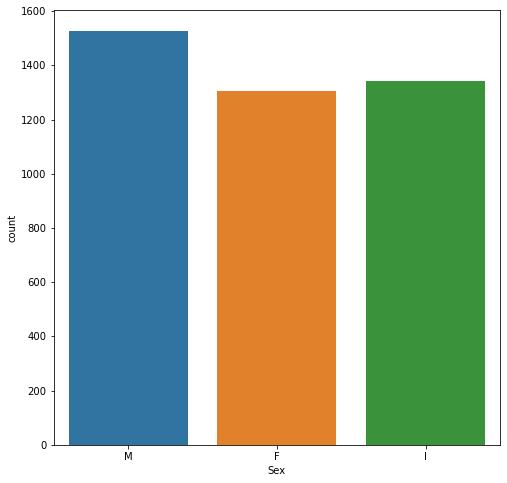

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(data['Sex'])

<strong>There is not much difference in the number of samples that are present in each Sex</strong>

<h4>Mean no of rings according to different Sex</h4>

In [11]:
sex_list = data.Sex.unique()
means = []
for sex in sex_list:
    reg = [data.iloc[i, -1] for i in range(len(data)) if data.iloc[i,0] == sex]
    reg = pd.Series(reg)
    means.append(reg.mean())
    
    
sex_means= pd.DataFrame({'Sex':sex_list, 'Mean No of Rings':means})
sex_means = sex_means.nlargest(3, 'Mean No of Rings')
sex_means

Sex  Mean No of Rings
1   F         11.129304
0   M         10.705497
2   I          7.890462

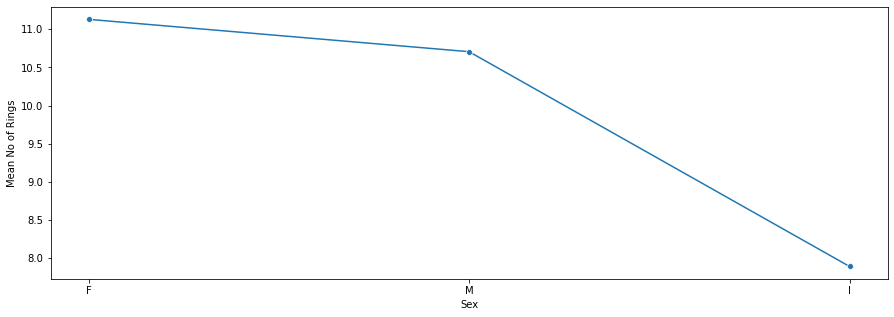

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Sex', y='Mean No of Rings', data=sex_means,marker='o')

<strong>As we interpreted from our strippplot, Females have highest no of rings on average(11.12), followed by males(10.70) and infants have least no of rings(7.89)</strong>

<h4>Plot of Different Varaibles with No of Rings , with hue as Sex</h4>

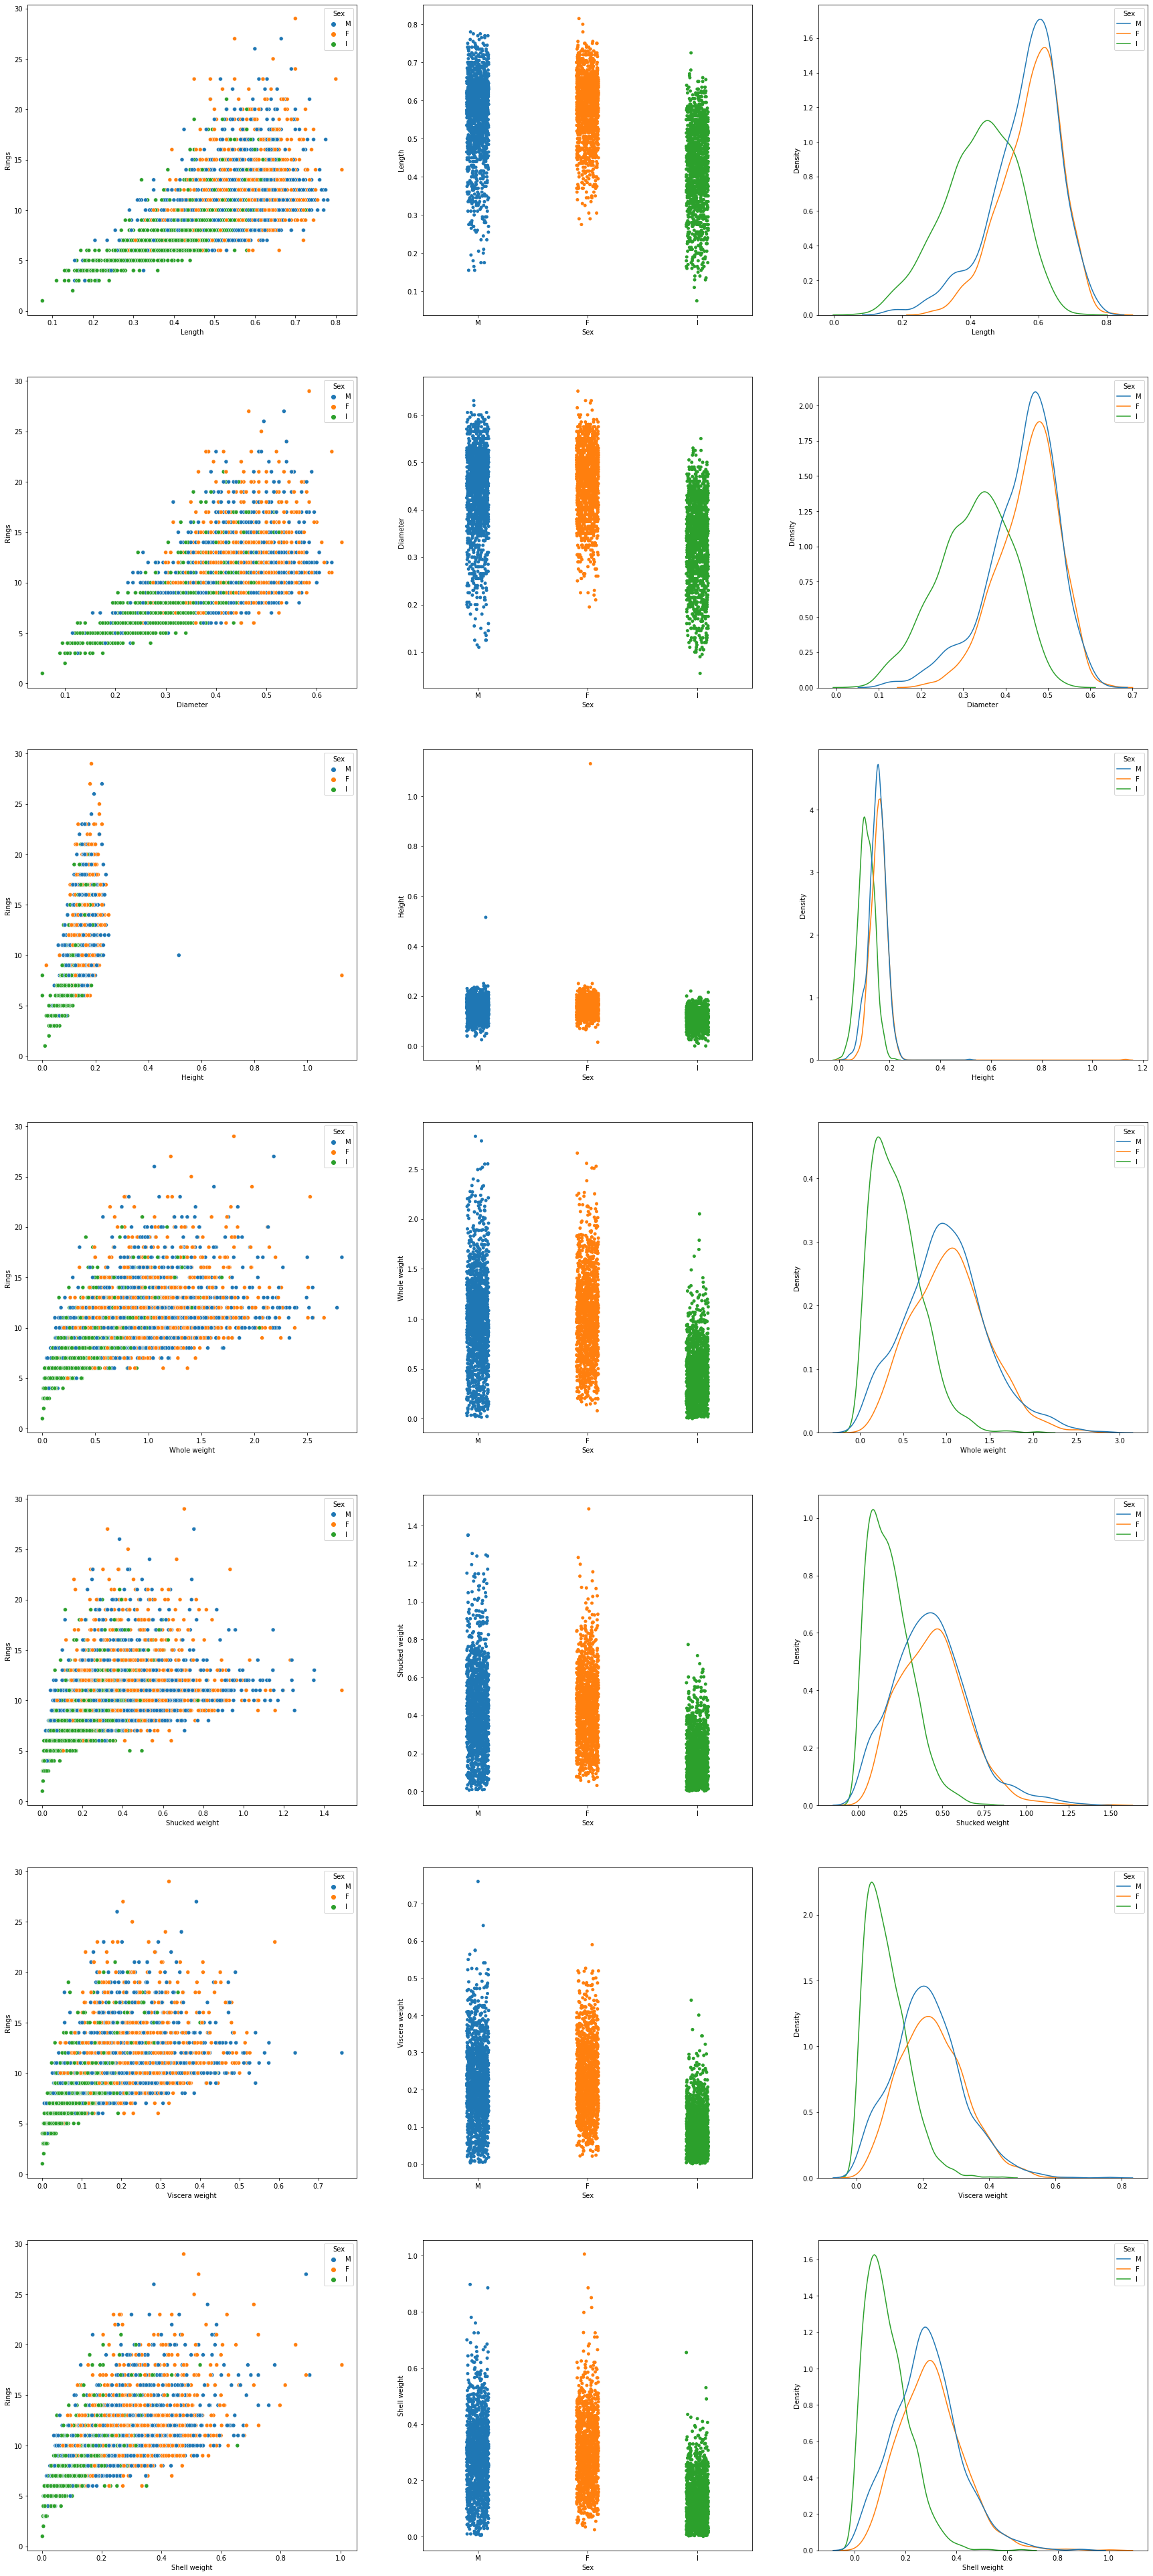

In [13]:
plt.figure(figsize=(30,70))
plotnumber=1
for i in data.drop(columns=['Sex', 'Rings']):
    plt.subplot(7,3, plotnumber)
    sns.scatterplot(x=i, y='Rings', hue='Sex', data=data)
    plotnumber+=1
    plt.subplot(7,3, plotnumber)
    sns.stripplot(x='Sex', y=i, data=data)
    plotnumber+=1
    plt.subplot(7,3, plotnumber)
    sns.kdeplot(x=i, hue='Sex', data=data)
    plotnumber+=1

<strong>
    <h3>Interpretations From above plots</h3>
    <ul>
        <li>In most of the scatterplots, infants lie in the lower left of the plot, meanning that infants have low age and whatever the other varaiable is, that is also low.</li>
        <li>The above point can also be proved in the stripplots, where there are not much infants in the upper half of each of the plot.</li>
        <li>The KDE plots which shows the density of each variable according to the Sex, alos interpert the same. The plot for each variable are more dense on the left side for infants, which means that infants usually have low each variable. Whereas the density of male and female for each variable are fairly towards the middle of the plot, except the height which means that there are outliers in height as we confirmed in the scatterplots. </li>
    </ul>
</strong>

<h3>Pairplot</h3>

<Figure size 1440x1440 with 0 Axes>

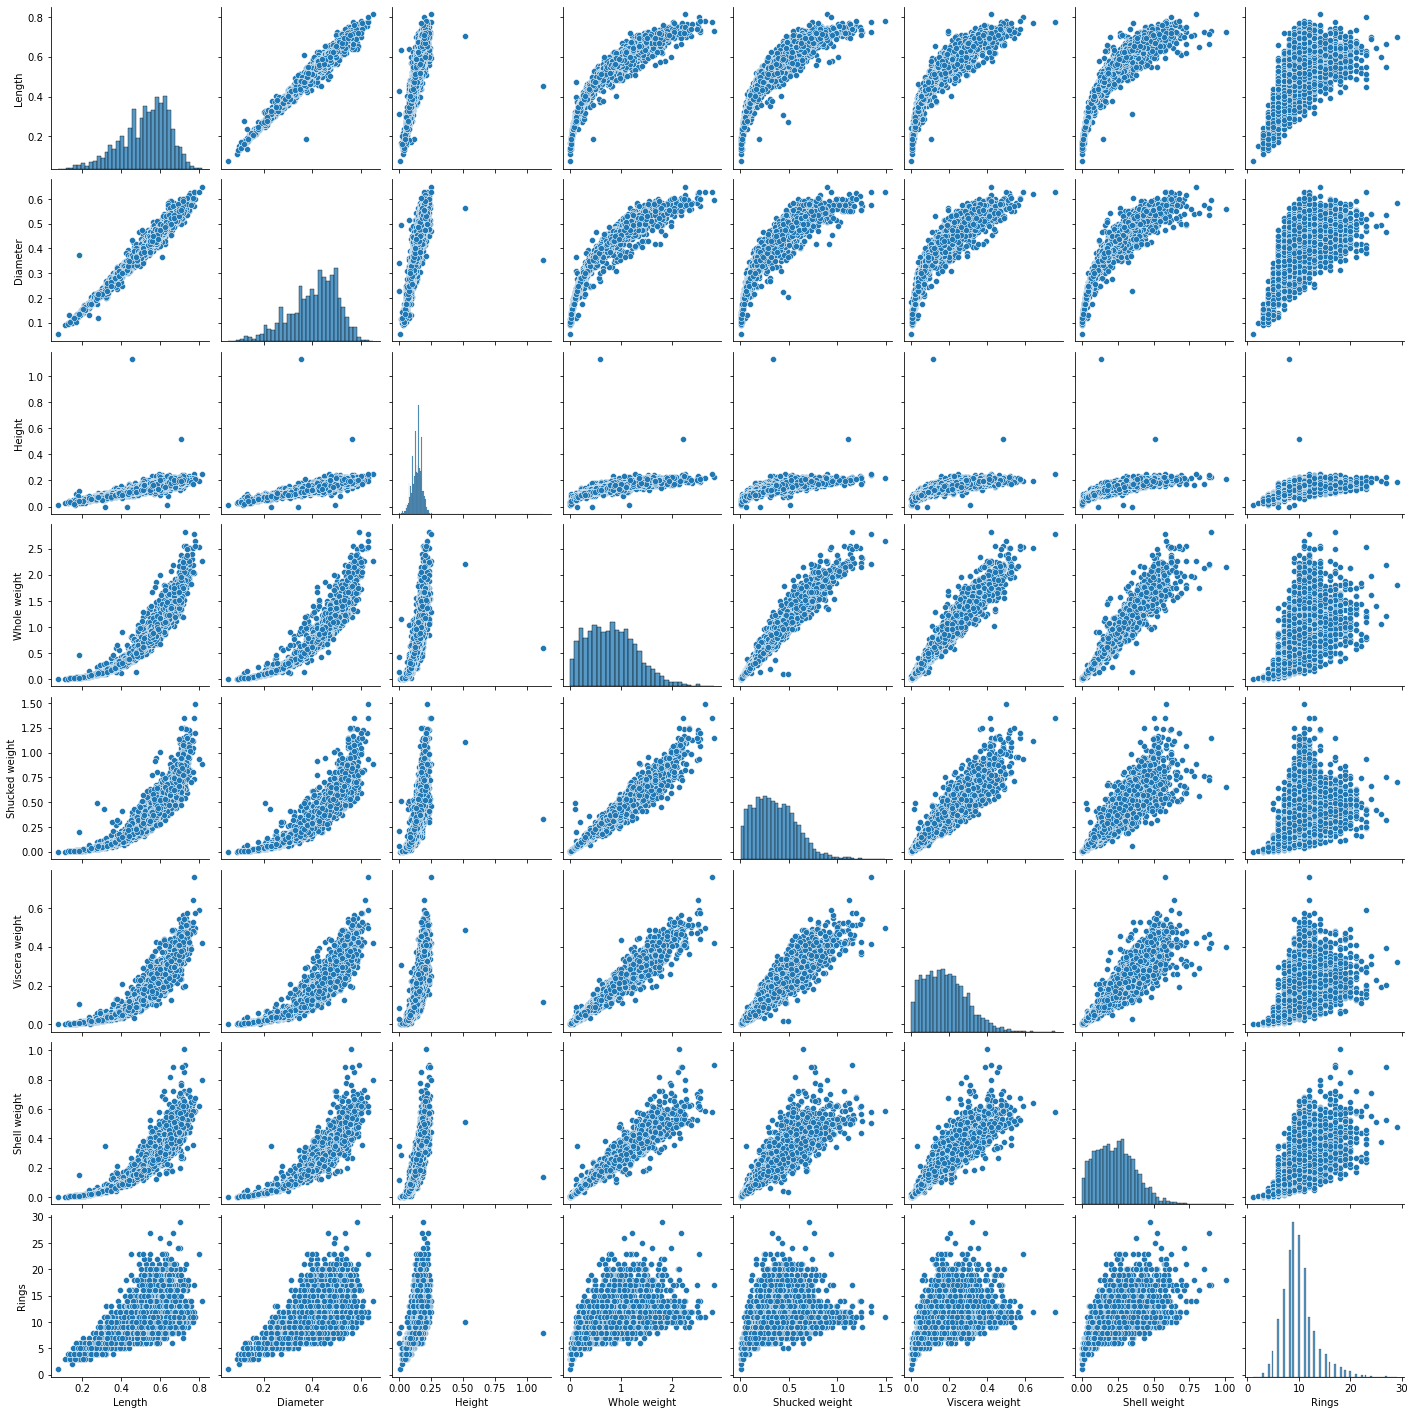

In [14]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.savefig('Pairplot.png')

<strong>
    <h3>Almost all feature variables have high correlation with each other, which means that there can be a huge multicollinearity problem in this dataset.</h3>
</strong>

<h3>Correlaion Matrix<h3>

In [15]:
data.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

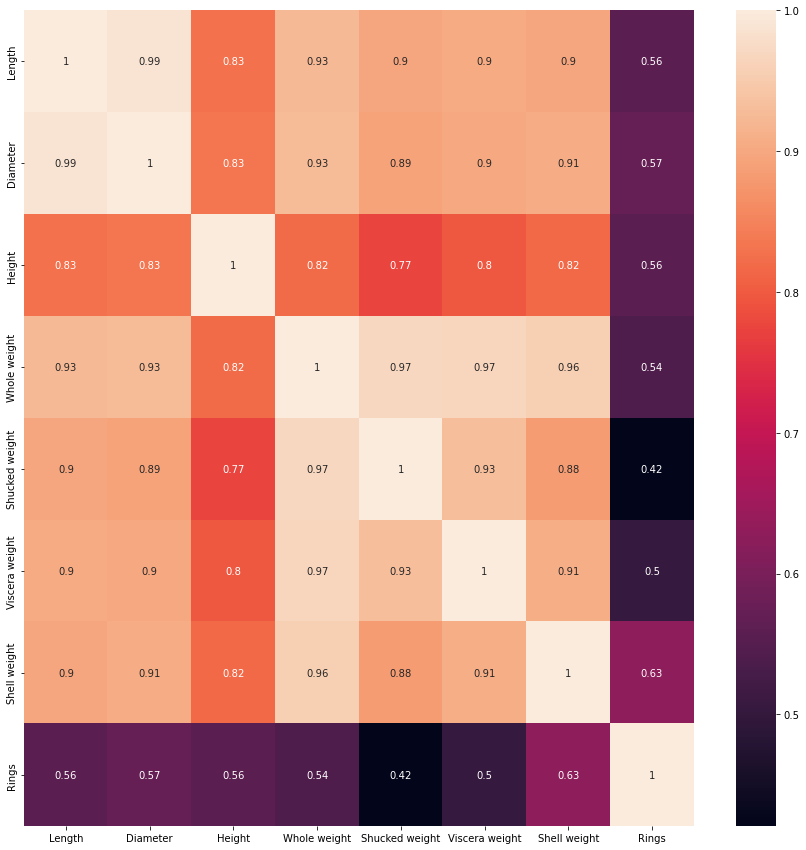

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

<strong>Outcomes of Correlation Matrix
    <ul>
        <li>Length has correlation of 56% with No of Rings</li>
        <li>Diameter has correlation of 57% with No of Rings</li>
        <li>Height has correlation of 56% with No of Rings</li>
        <li>Whole weight has correlation of 54% with no of Rings</li>
        <li>Shucked weight has correlation of 42% with no of Rings</li>
        <li>Viscera Weight has correlation of 50% with no of Rings</li>
        <li>Shell Weight has correlation of 63% with No of Rings</li>
        <li>Diameter has correlation of 99% with Length</li>
        <li>Height has correlation of 83% with Length</li>
        <li>Height has correlation of 83% with Diameter</li>
        <li>Whole Weight has correlation of 93% with Length</li>
        <li>Whole Weight has correlation of 93% with Diameter</li>
        <li>Whole Weight has correlation of 82% with Height</li>
        <li>Shucked Weight has correlation of 90% with Length</li>
        <li>Shucked Weight has correlation of 89% with Diameter</li>
        <li>Shucked Weight has correlation of 77% with Height</li>
        <li>Shucked Weight has correlation of 97% with Whole weight</li>
        <li>Viscera Weight has correlation of 90% with Length</li>
        <li>Viscera Weight has correlation of 90% with Diameter</li>
        <li>Viscera Weight has correlation of 80% with Height</li>
        <li>Viscera Weight has correlation of 97% with Whole weight</li>
        <li>Viscera Weight has correlation of 93% with Shucked weight</li>
        <li>Shell Weight has correlation of 90% with Length</li>
        <li>Shell Weight has correlation of 91% with Diameter</li>
        <li>Shell Weight has correlation of 82% with Height</li>
        <li>Shell Weight has correlation of 96% with Whole weight</li>
        <li>Shell Weight has correlation of 88% with Shucked weight</li>
        <li>Shell Weight has correlation of 91% with Viscera weight</li>
    </ul>
    
<strong>Here again we can see that all features are highly correlated to each other, this again leads to a multicollinearity problem
</strong>


<h3>Descriptive Statistics</h3>

In [17]:
data.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

<h4>Outcome of Descriptive Statistics</h4>
<ul><li>SEX (Nomianal - Categorical Variable)
    <ul>Distinct Values
        <li>Infant</li>
        <li>Male</li>
        <li>Female</li>
    </ul>
    </li>
    <li>Length
        <ul>
            <li>Mean -: 0.52</li>
            <li>STD -: 0.12</li>
            <li>Min -: 0.07</li>
            <li>Max -: 0.81</li>
        </ul>
    </li>
    <li>Diameter
        <ul>
            <li>Mean -: 0.40</li>
            <li>STD -: 0.09</li>
            <li>Min -: 0.055</li>
            <li>Max -: 0.64</li>
        </ul>
    </li>
    <li>Height
        <ul>
            <li>Mean -: 0.13</li>
            <li>STD -: 0.04</li>
            <li>Min -: 0.00</li>
            <li>Max -: 1.13</li>
        </ul>
    </li>
    <li>Whole Weight
        <ul>
            <li>Mean -: 0.82</li>
            <li>STD -: 0.49</li>
            <li>Min -: 0.002</li>
            <li>Max -: 2.82</li>
        </ul>
    </li>
    <li>Shucked Weight
        <ul>
            <li>Mean -: 0.35</li>
            <li>STD -: 0.22</li>
            <li>Min -: 0.001</li>
            <li>Max -: 1.488</li>
        </ul>
    </li>
    <li>Viscera Weight
        <ul>
            <li>Mean -: 0.180</li>
            <li>STD -: 0.109</li>
            <li>Min -: 0.0005</li>
            <li>Max -: 0.76</li>
        </ul>
    </li>
    <li>Shell Weight
        <ul>
            <li>Mean -: 0.23</li>
            <li>STD -: 0.13</li>
            <li>Min -: 0.001</li>
            <li>Max -: 1.00</li>
        </ul>
    </li>
    <li>Rings (Outcome Variable)
        <ul>
            <li>Mean -: 9.93</li>
            <li>STD -: 3.22</li>
            <li>Min -: 1.00</li>
            <li>Max -: 29.00</li>
        </ul>
    </li>
</ul>

<h3>Distirbution Plots</h3>

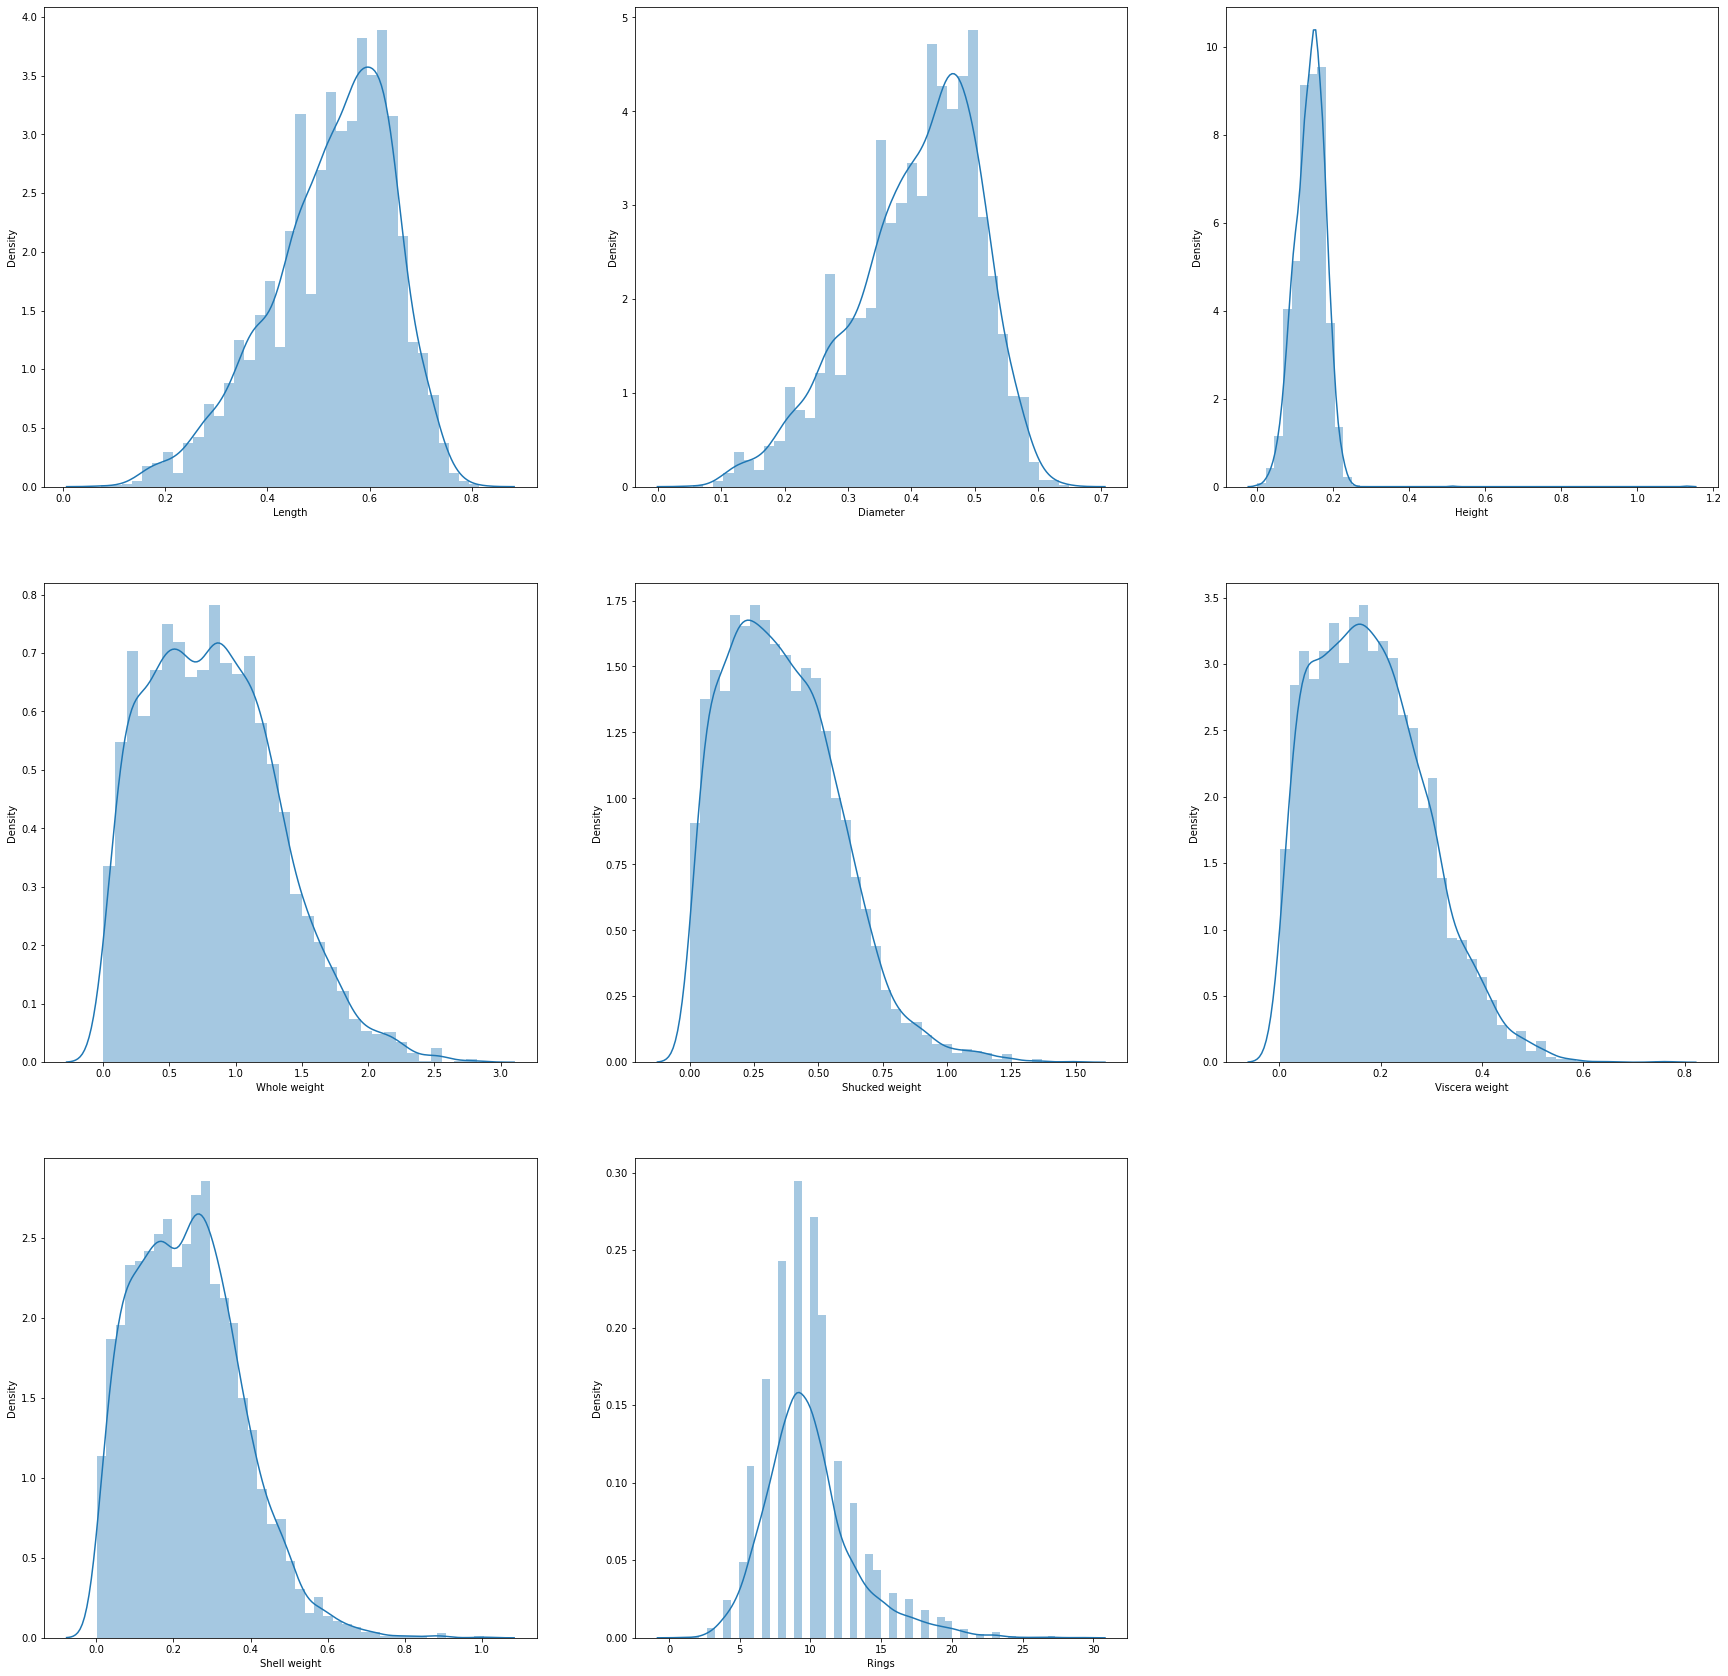

In [18]:
plt.figure(figsize=(30,30))
plotnumber = 1
for i in data.drop(columns=['Sex']):
    plt.subplot(3,3,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
    

<strong>Height is heavily skewed to the left</strong>

<h3>Handling Outliers</h3>

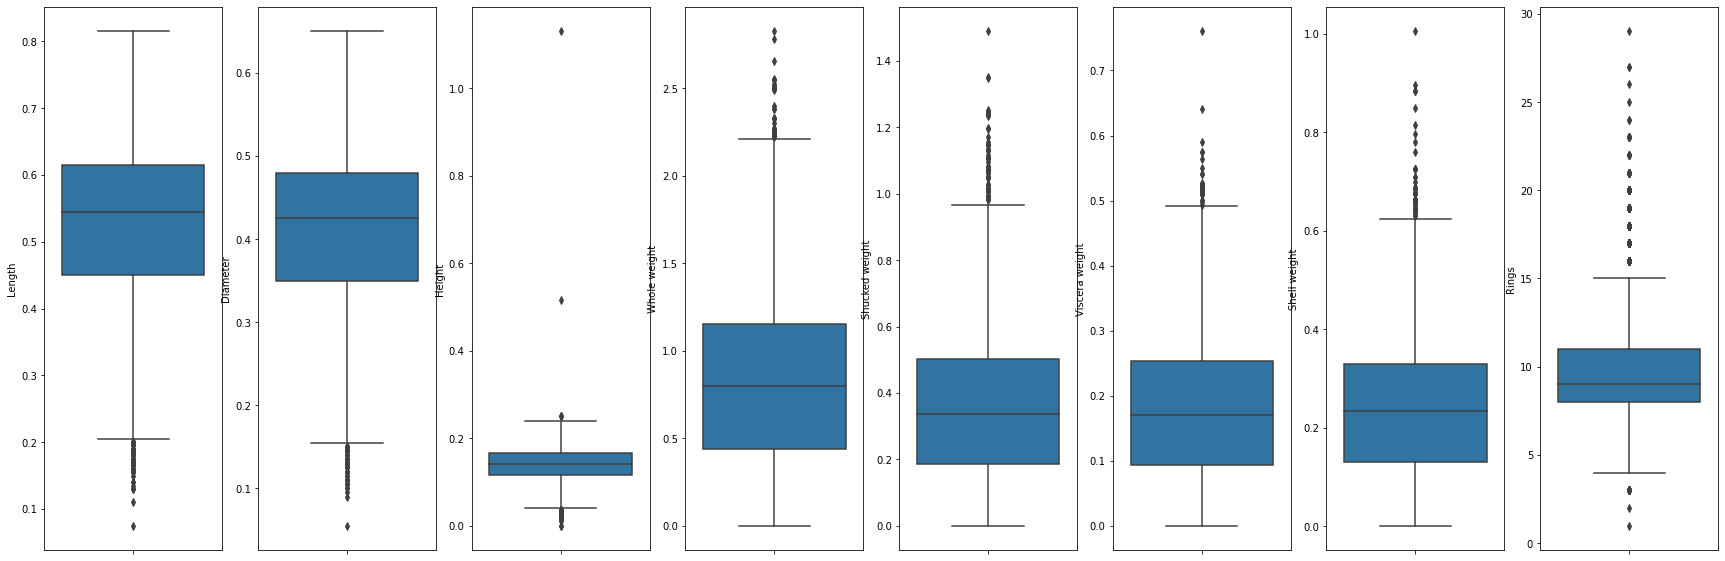

In [19]:
plt.figure(figsize=(30,10))
plotnumber = 1
for i in data.drop(columns=['Sex']):
    plt.subplot(1,8,plotnumber)
    sns.boxplot(y=data[i],orient='v')
    plotnumber+=1

<strong>Almost all variables have outliers, but length, Whole Weight ansd Shell Weight have more outliers</strong>

In [20]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<strong>Height and shucked weight are more heavily skewed</strong>

<strong><h4>Dropping Outliers using z-score</h4></strong>

In [21]:
X = data.drop(columns=['Sex', 'Rings'])
print(X.shape)

(4177, 7)


<strong>We do not choose Sex and rings as we do not apply any transformation categorical variables and outcome variables</strong>

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(X))

In [23]:
data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

Old Shape (4177, 9)
New Shape (4084, 9)
Total Dropped Rows 93


In [24]:
data_new.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

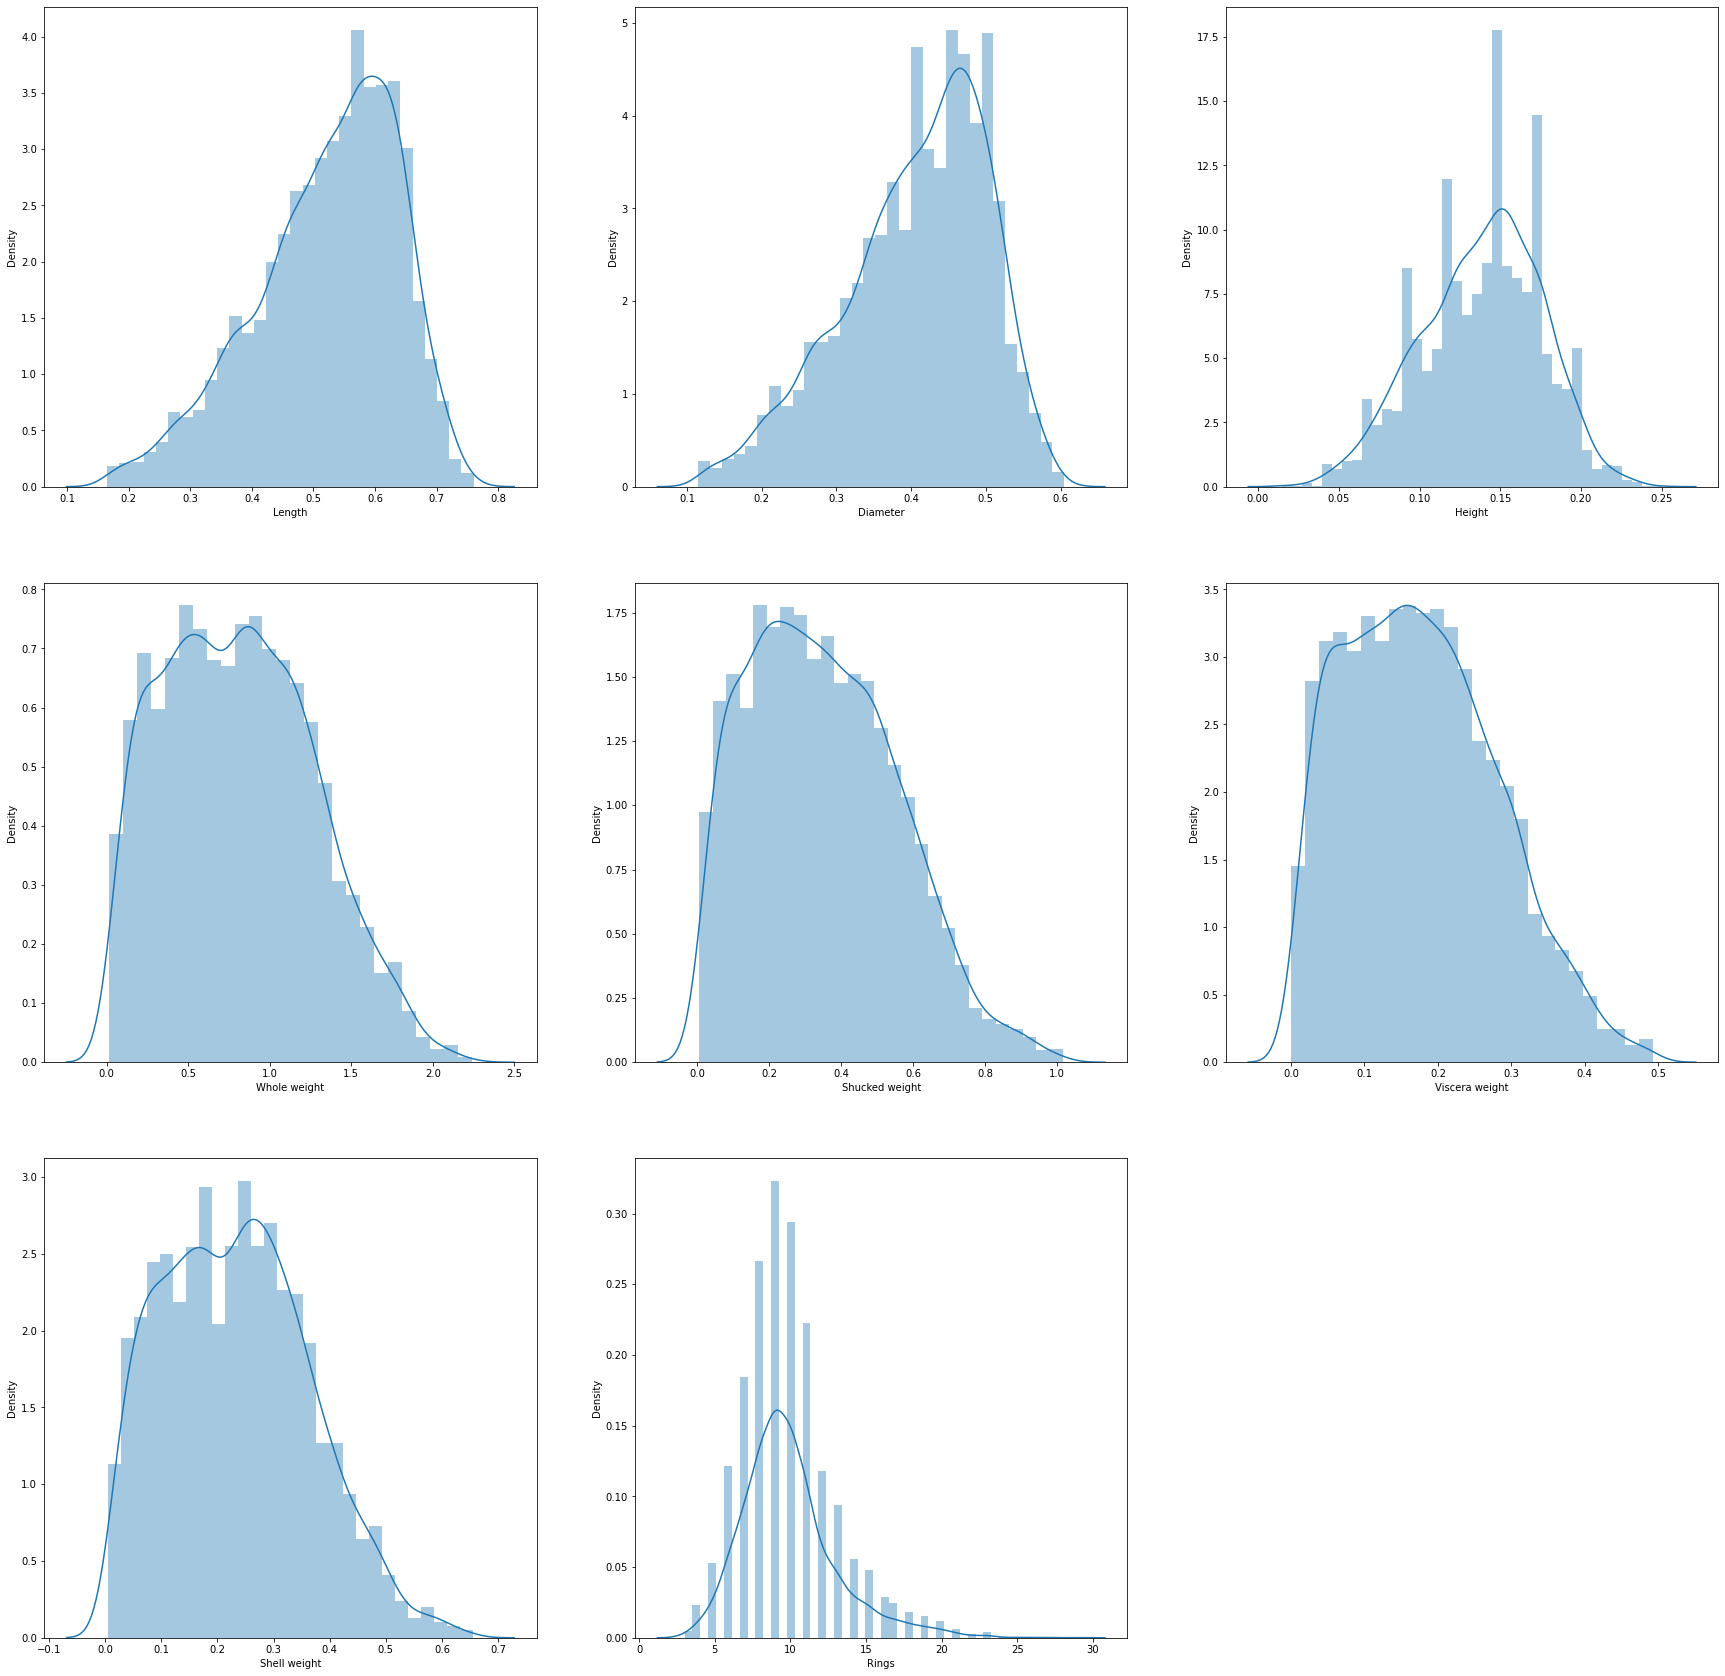

In [25]:
plt.figure(figsize=(30,30))
plotnumber = 1
for i in data_new.drop(columns=['Sex']):
    plt.subplot(3,3,plotnumber)
    sns.distplot(data_new[i])
    plotnumber+=1

<strong>Aftr Dropping Outliers, all predictor variables now follow an dsitribution close to normal</strong>

In [26]:
data_new.skew()

Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

<strong>We have managed top remove skew from height and shucked weight, lets remove from other variables too.</strong>

<h3>Transformations to remove skew</h3>

<h4>Log Transformation</h4>

In [27]:
X = data_new.drop(columns=['Rings'])
y = data_new.Rings

In [28]:
X.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [29]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4084, dtype: int64

In [30]:
X_logged = np.log1p(X.iloc[:, 1:])

In [31]:
X_logged.skew()

Length           -0.817241
Diameter         -0.762802
Height           -0.327600
Whole weight     -0.130385
Shucked weight    0.156656
Viscera weight    0.260392
Shell weight      0.147306
dtype: float64

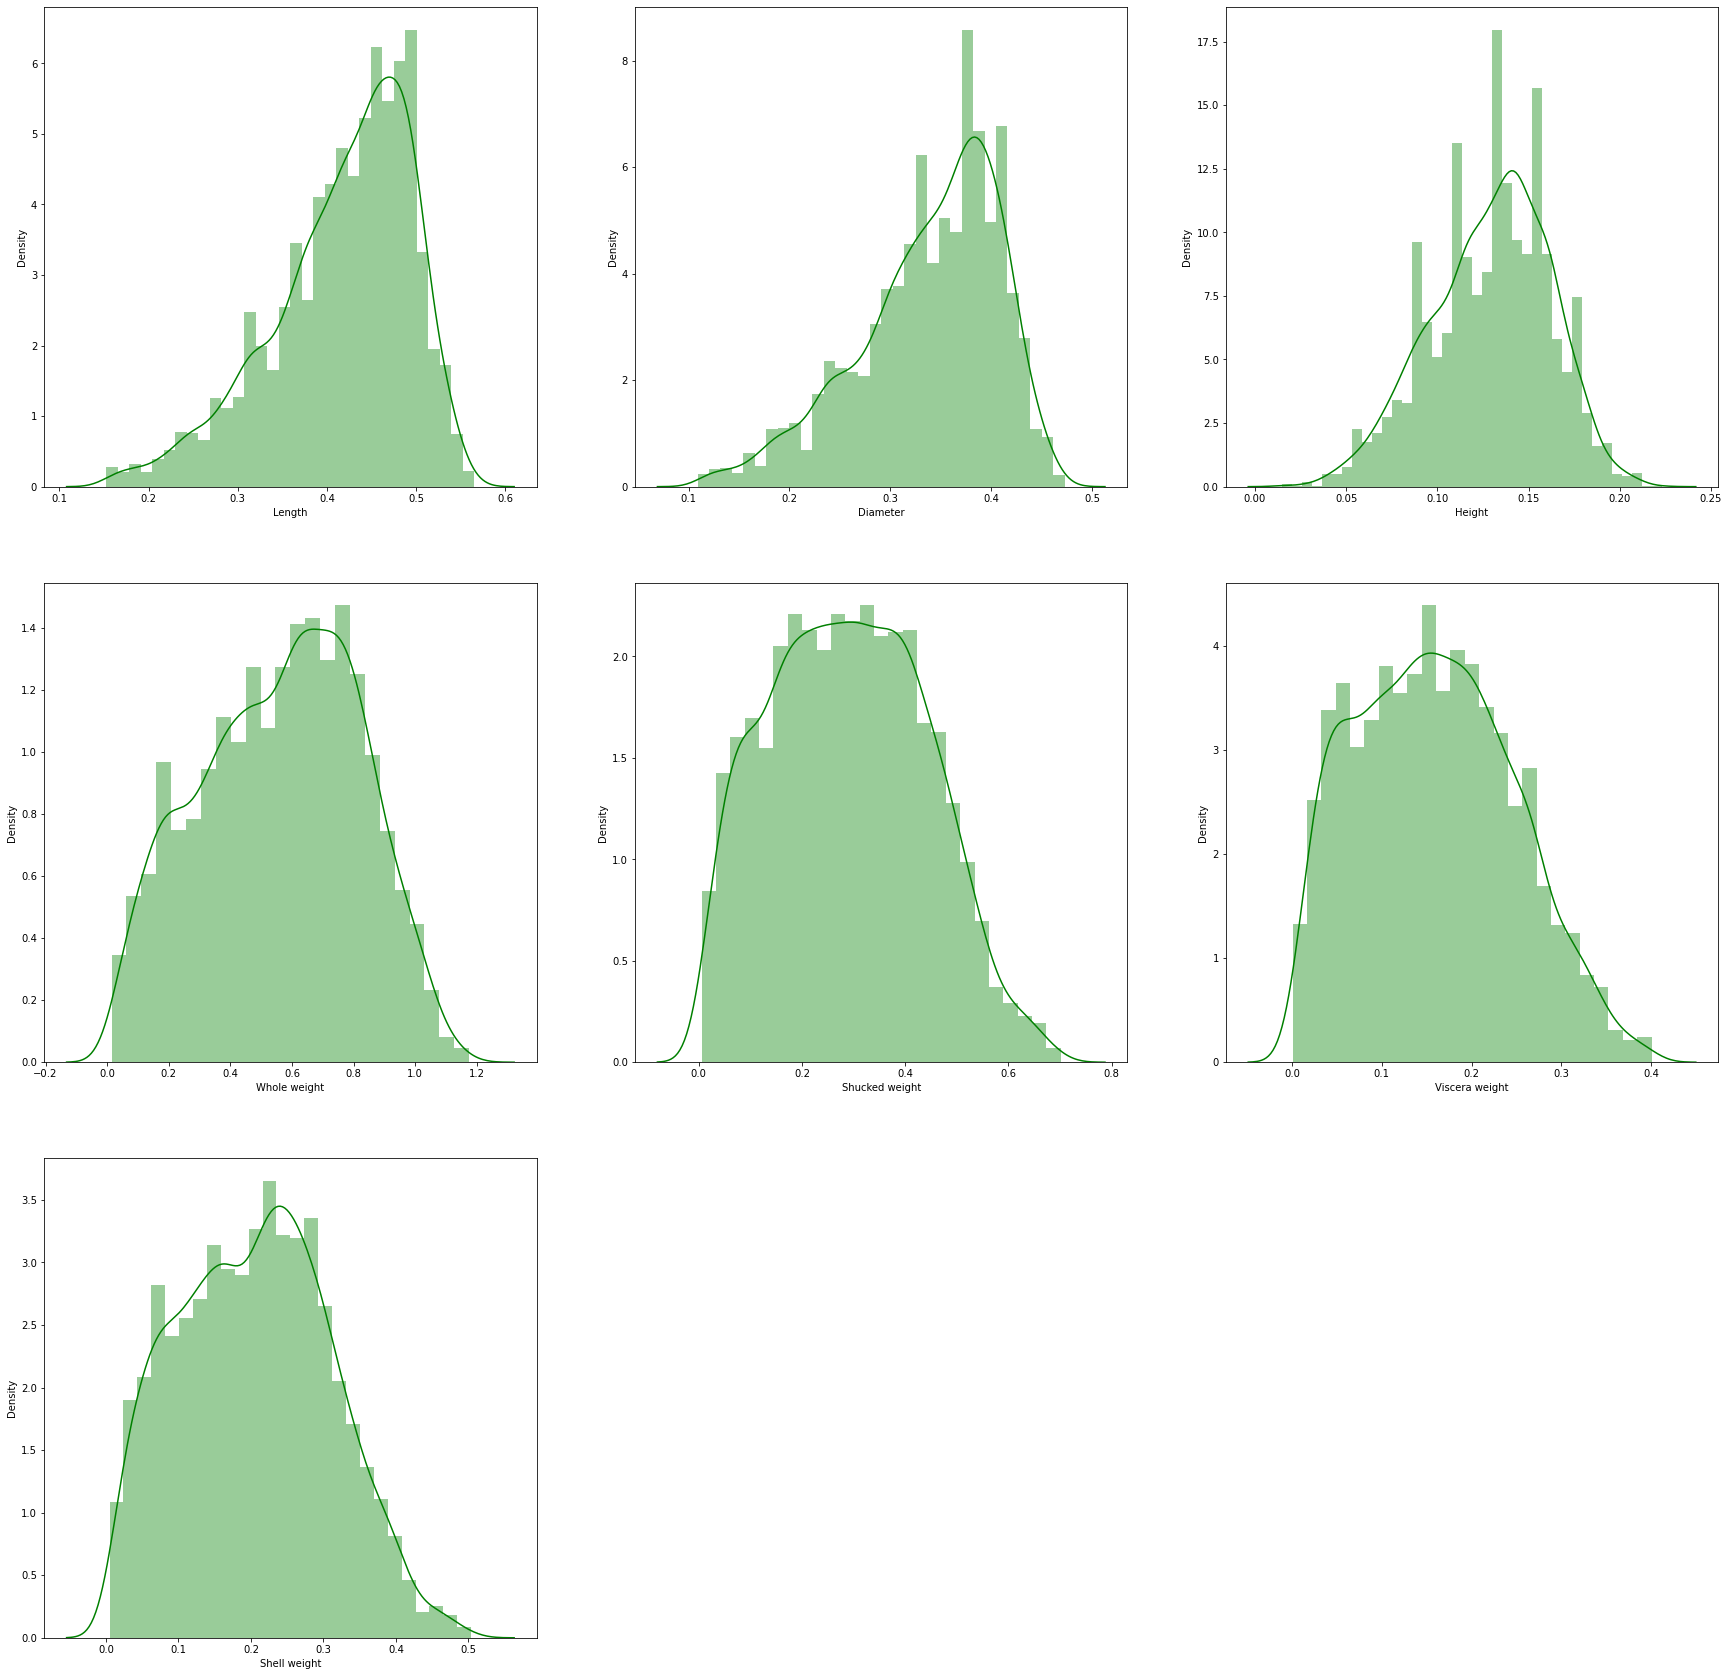

In [32]:
plt.figure(figsize=(30,30))
plotnumber = 1
for i in X_logged:
    plt.subplot(3,3,plotnumber)
    sns.distplot(X_logged[i], color='green')
    plotnumber+=1

<strong>Log Transformation does not help in removing skew</strong>

<h4>Square Root Transformation</h4>

In [33]:
X_root = np.sqrt(X.iloc[:, 1:])

In [34]:
X_root.skew()

Length           -0.950779
Diameter         -0.935335
Height           -0.656568
Whole weight     -0.316370
Shucked weight   -0.236619
Viscera weight   -0.239136
Shell weight     -0.312424
dtype: float64

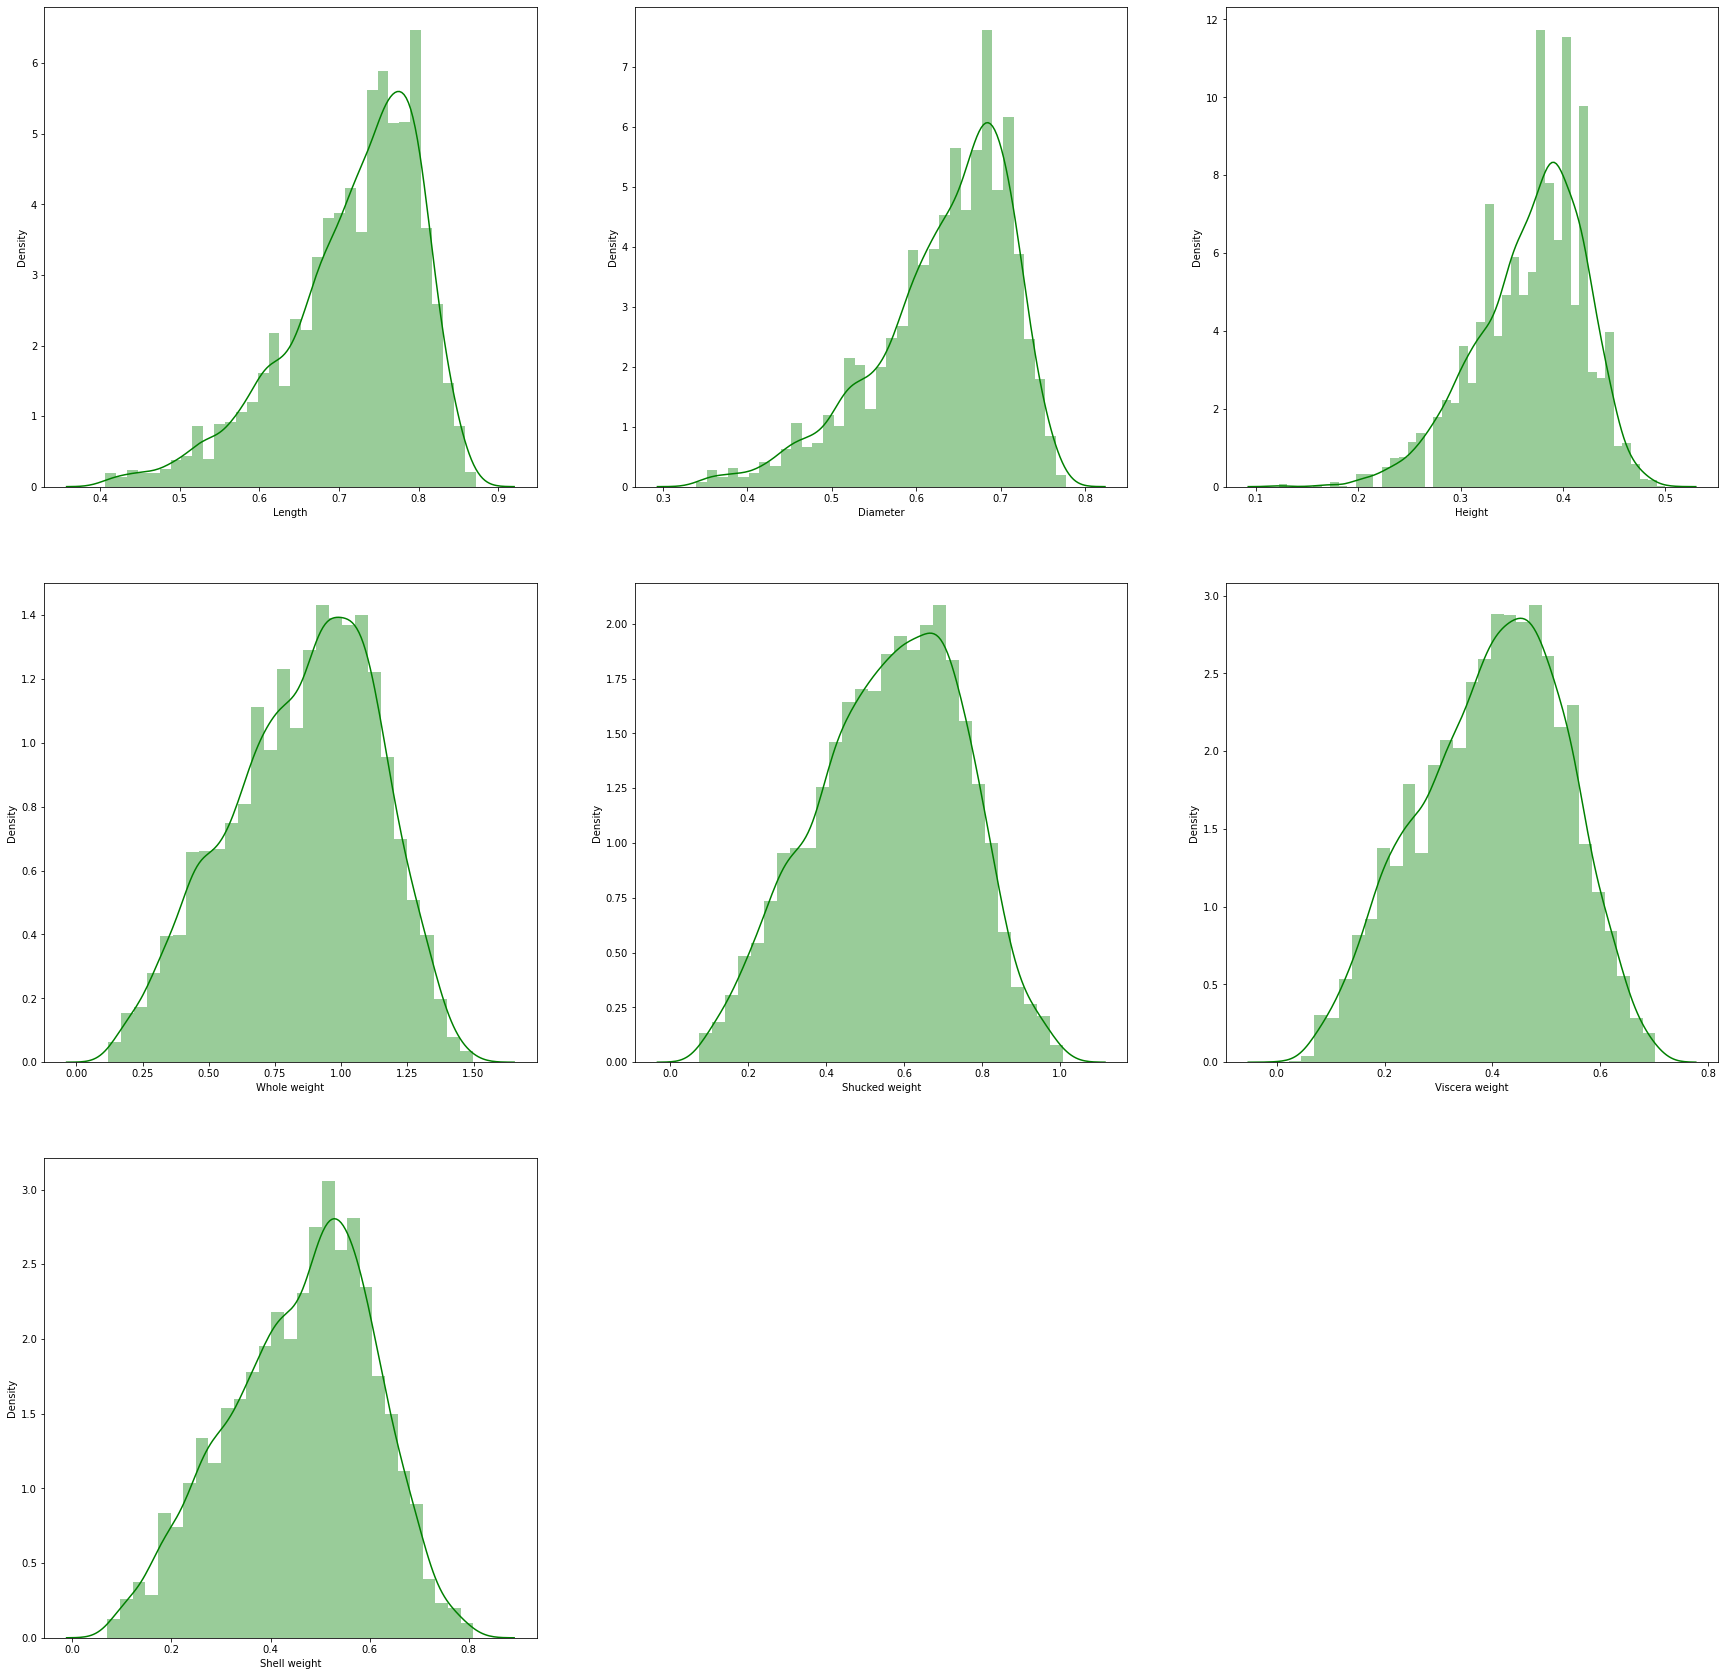

In [35]:
plt.figure(figsize=(30,30))
plotnumber = 1
for i in X_root:
    plt.subplot(3,3,plotnumber)
    sns.distplot(X_root[i], color='green')
    plotnumber+=1

<strong>Square Root Transformation also doest not help in removing skew</strong>

<h4>Power Transformation (Yeo- Johnson)</h4>

In [36]:
from sklearn.preprocessing import power_transform

In [37]:
for i in  X.drop(columns=['Sex']):
    X[i] = power_transform(np.array(X[i]).reshape(-1,1)).reshape(4084)

In [38]:
X.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [39]:
X.skew()

Length           -0.084034
Diameter         -0.080768
Height           -0.016167
Whole weight     -0.018290
Shucked weight    0.020227
Viscera weight    0.034242
Shell weight      0.017040
dtype: float64

In [40]:
X.shape

(4084, 8)

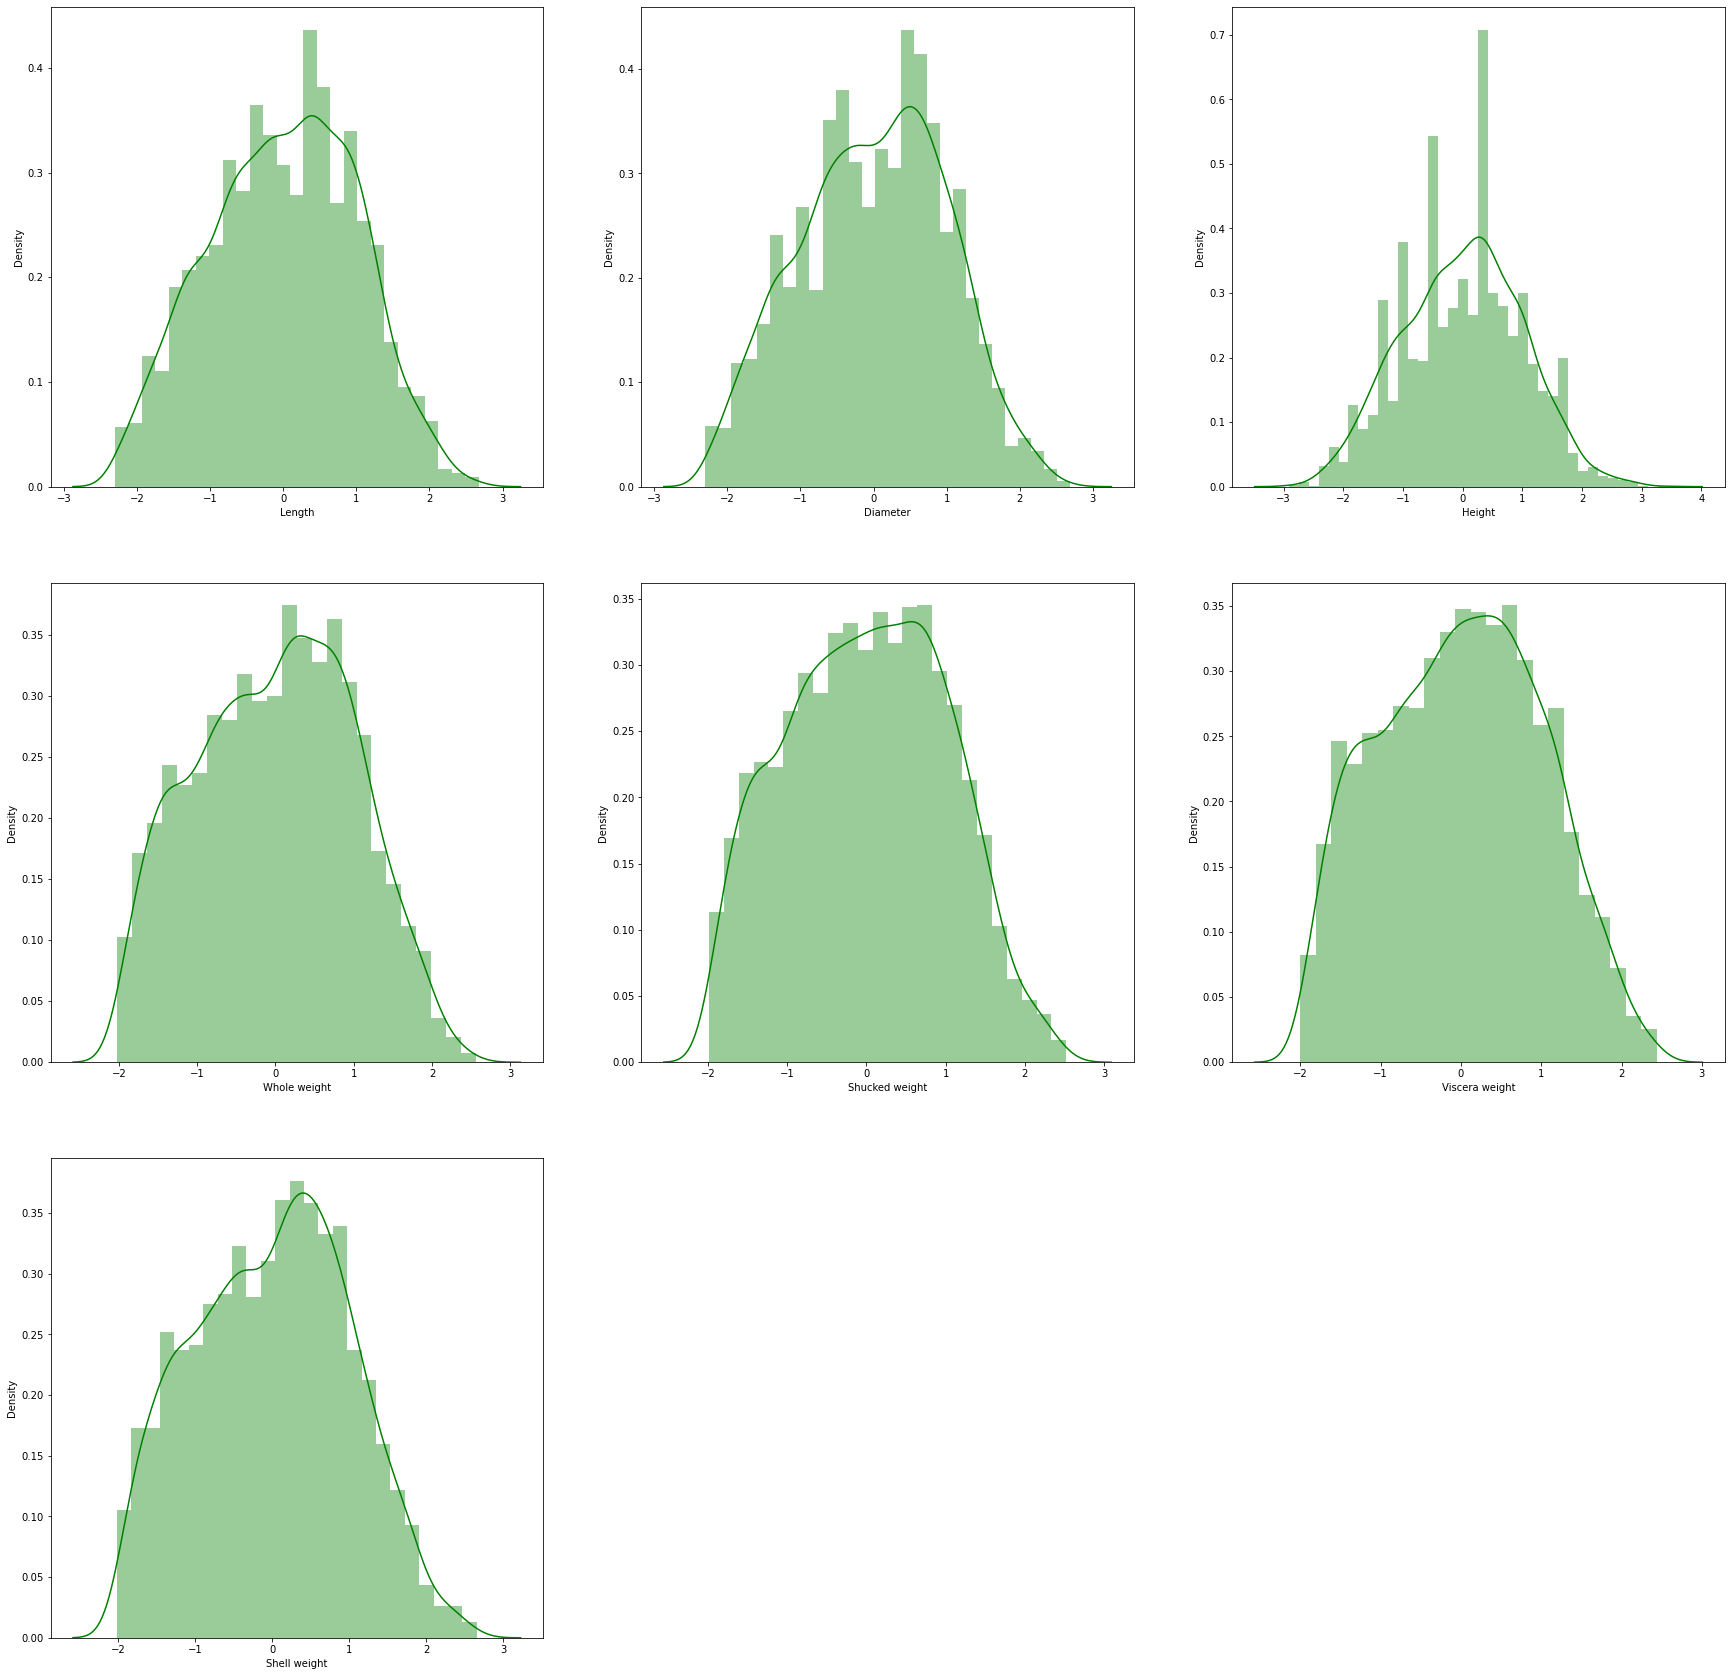

In [41]:
plt.figure(figsize=(30,30))
plotnumber = 1
for i in X.drop(columns=['Sex']):
    plt.subplot(3,3,plotnumber)
    sns.distplot(X[i], color='green')
    plotnumber+=1

<strong>Power Transformation does a good job in removing skew. Applying power Trasnformation as final</strong>

<h3>Scaling the dataset</h3>

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in X.drop(columns=['Sex']):
    X[i] = sc.fit_transform(np.array(X[i]).reshape(-1,1)).reshape(4084,)
    
X

Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0      M -0.696161 -0.554594 -1.168296     -0.588451       -0.550030   
1      M -1.420433 -1.409424 -1.289091     -1.362331       -1.319429   
2      F -0.058200  0.025024 -0.142854     -0.199039       -0.371744   
3      M -0.811094 -0.554594 -0.409259     -0.583488       -0.601436   
4      I -1.538442 -1.482282 -1.525912     -1.422319       -1.386634   
...   ..       ...       ...       ...           ...             ...   
4172   F  0.278101  0.378060  0.698142      0.262973        0.209484   
4173   M  0.534430  0.257350 -0.142854      0.426834        0.528748   
4174   M  0.640858  0.693557  1.921334      0.839694        0.898004   
4175   F  0.916960  0.825397  0.269701      0.683156        0.920420   
4176   M  1.969454  1.844464  1.604265      2.140888        2.325904   

      Viscera weight  Shell weight  
0          -0.698406     -0.598766  
1          -1.341090     -1.340159  
2          -0.251272     -0.096466  
3          -0.550573     -0.555262  
4          -1.459221     -1.489465  
...              ...           ...  
4172        0.681527      0.208481  
4173        0.464194      0.295413  
4174        1.082325      0.641018  
4175        0.867974      0.555688  
4176        1.729627      1.822051  

[4084 rows x 8 columns]

In [43]:
X.mean()

Length           -6.089372e-17
Diameter          2.087785e-17
Height            1.565839e-17
Whole weight      1.391856e-17
Shucked weight    2.957695e-17
Viscera weight    4.523534e-17
Shell weight      0.000000e+00
dtype: float64

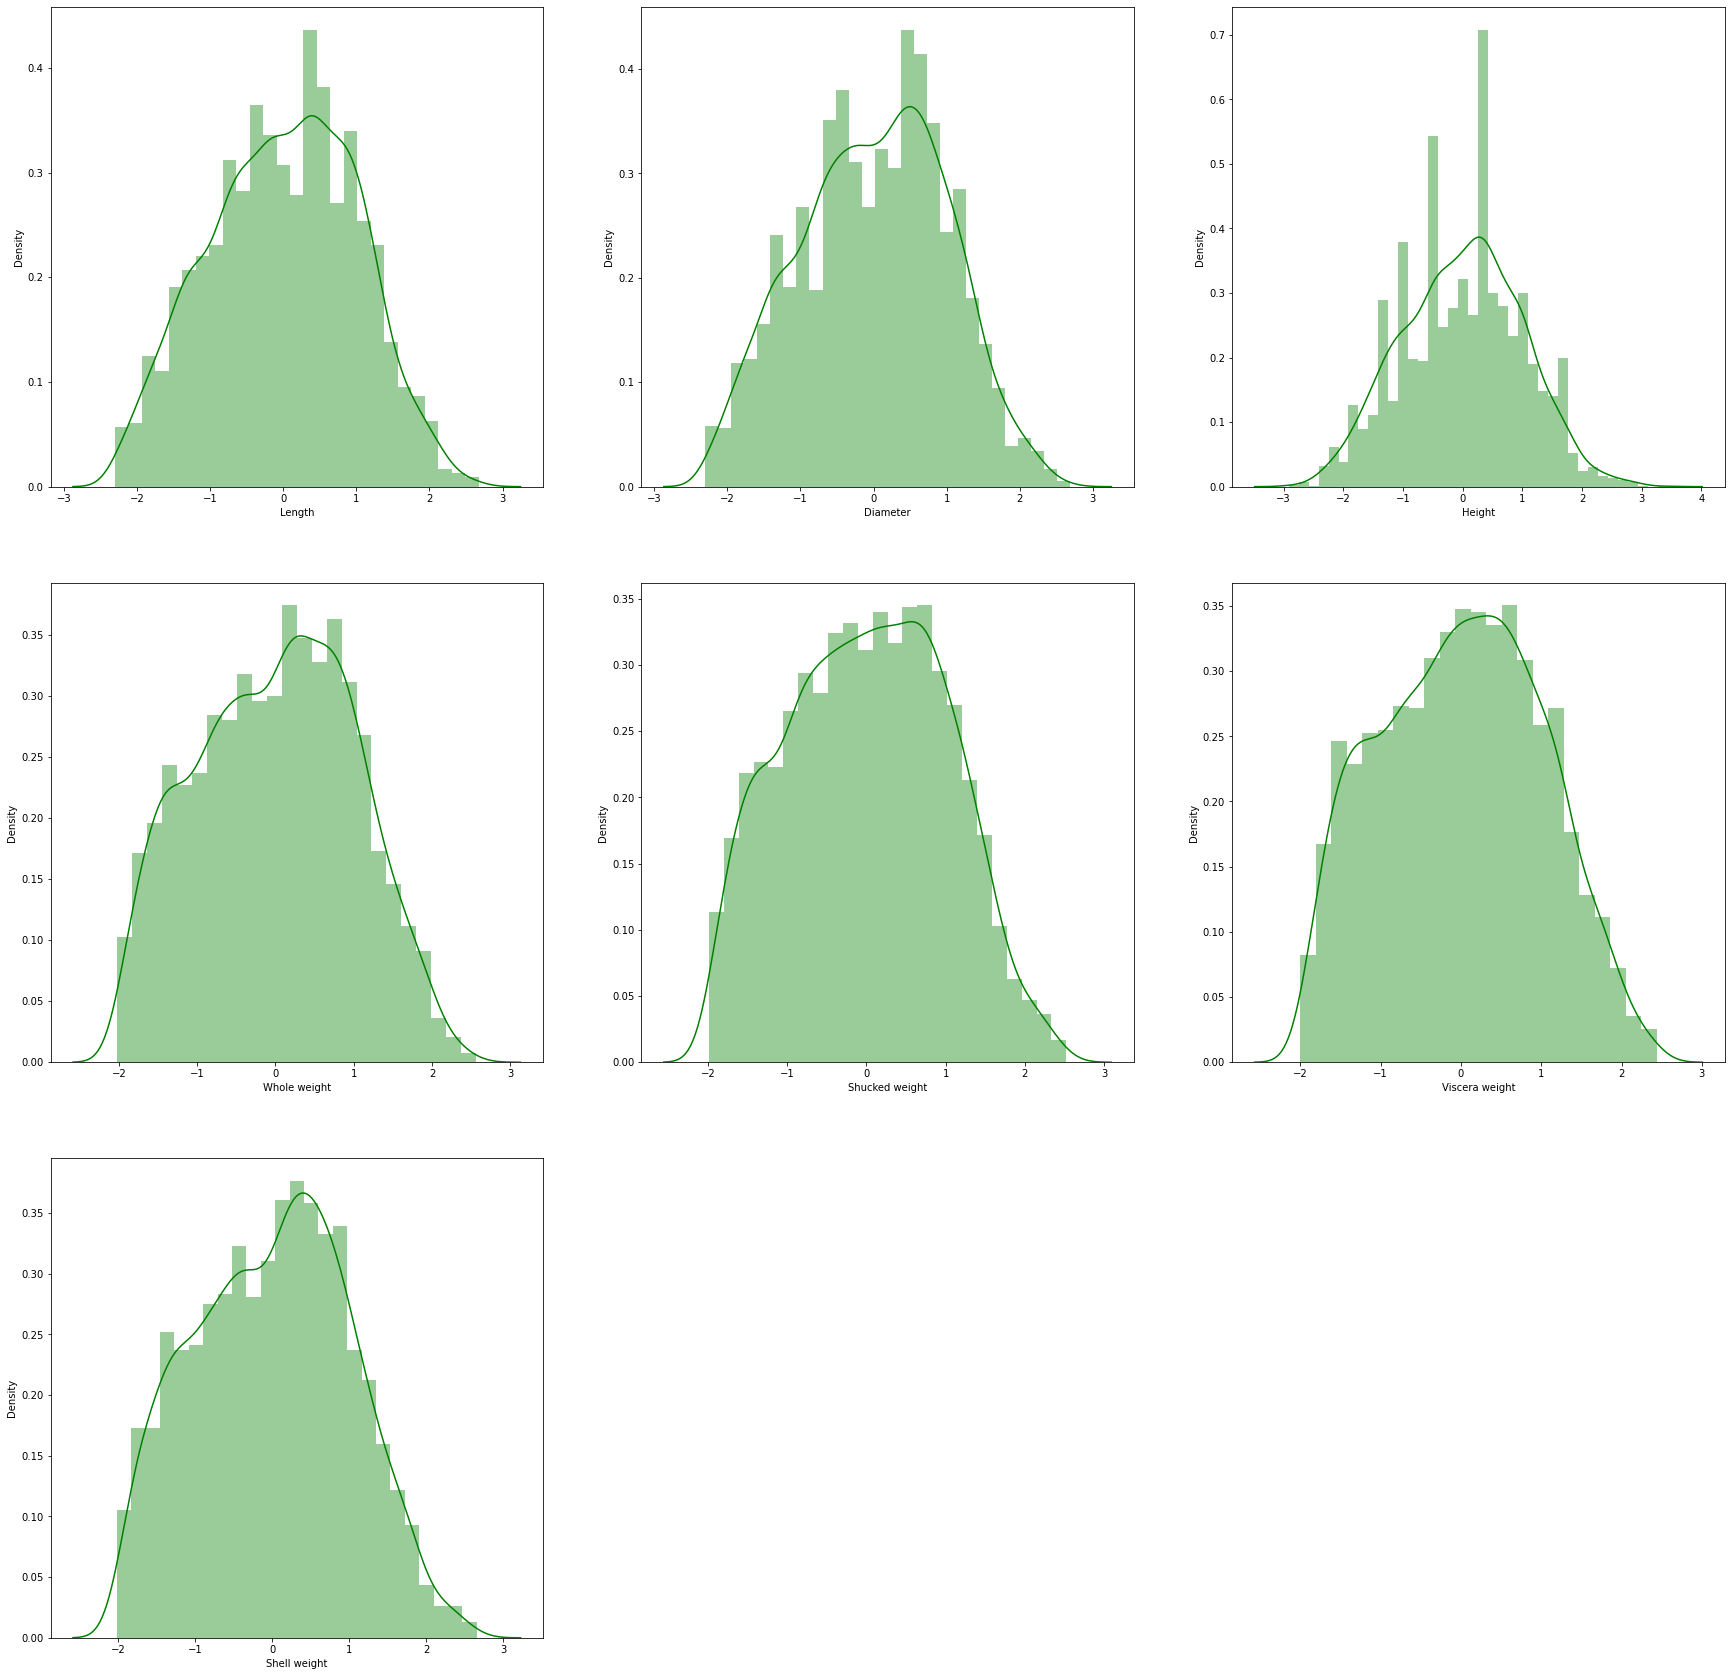

In [44]:
plt.figure(figsize=(30,30))
plotnumber = 1
for i in X.drop(columns=['Sex']):
    plt.subplot(3,3,plotnumber)
    sns.distplot(X[i], color='green')
    plotnumber+=1

<h4>Standard Scaler does a good job in scaling the dataset</h4>

In [45]:
X.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

<h3>Encoding Categorical Varaibles using get_dummies</h3>

In [46]:
X = pd.get_dummies(X)
X

Length  Diameter    Height  Whole weight  Shucked weight  \
0    -0.696161 -0.554594 -1.168296     -0.588451       -0.550030   
1    -1.420433 -1.409424 -1.289091     -1.362331       -1.319429   
2    -0.058200  0.025024 -0.142854     -0.199039       -0.371744   
3    -0.811094 -0.554594 -0.409259     -0.583488       -0.601436   
4    -1.538442 -1.482282 -1.525912     -1.422319       -1.386634   
...        ...       ...       ...           ...             ...   
4172  0.278101  0.378060  0.698142      0.262973        0.209484   
4173  0.534430  0.257350 -0.142854      0.426834        0.528748   
4174  0.640858  0.693557  1.921334      0.839694        0.898004   
4175  0.916960  0.825397  0.269701      0.683156        0.920420   
4176  1.969454  1.844464  1.604265      2.140888        2.325904   

      Viscera weight  Shell weight  Sex_F  Sex_I  Sex_M  
0          -0.698406     -0.598766      0      0      1  
1          -1.341090     -1.340159      0      0      1  
2          -0.251272     -0.096466      1      0      0  
3          -0.550573     -0.555262      0      0      1  
4          -1.459221     -1.489465      0      1      0  
...              ...           ...    ...    ...    ...  
4172        0.681527      0.208481      1      0      0  
4173        0.464194      0.295413      0      0      1  
4174        1.082325      0.641018      0      0      1  
4175        0.867974      0.555688      1      0      0  
4176        1.729627      1.822051      0      0      1  

[4084 rows x 10 columns]

<h3>Checking for multicollinearity using VIF</h3>

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

vif        Features
0   34.538593          Length
1   33.097557        Diameter
2    6.481802          Height
3  131.659427    Whole weight
4   34.709930  Shucked weight
5   21.533698  Viscera weight
6   29.577893    Shell weight
7    1.129286           Sex_F
8    1.377325           Sex_I
9    1.067729           Sex_M

<strong>As we interpreted in our EDA , there is a huge multicollinearity problem in our dataset</strong>

<strong>Dropping Whole Weight and then checking VIF</strong>

In [48]:
X = X.drop(columns=['Whole weight'])

In [49]:


vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

vif        Features
0  34.480837          Length
1  33.063007        Diameter
2   6.458794          Height
3  13.364459  Shucked weight
4  14.492645  Viscera weight
5  14.942474    Shell weight
6   1.127967           Sex_F
7   1.373250           Sex_I
8   1.067019           Sex_M

<strong>Dropping Length and then checking VIF</strong>

In [50]:
X = X.drop(columns=['Length'])

In [51]:

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

vif        Features
0  17.863598        Diameter
1   6.431770          Height
2  12.341224  Shucked weight
3  13.917719  Viscera weight
4  14.757291    Shell weight
5   1.125791           Sex_F
6   1.362029           Sex_I
7   1.063786           Sex_M

<strong>Dropping Diameter and then checking VIF</strong>

In [52]:
X = X.drop(columns=['Diameter'])

In [53]:

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

vif        Features
0   6.427911          Height
1   9.908794  Shucked weight
2  13.444297  Viscera weight
3  11.062917    Shell weight
4   1.125381           Sex_F
5   1.360934           Sex_I
6   1.061278           Sex_M

<strong>VIF is now less than 15 for all variables remaining in our datset, if we try to drop any further we would be left with only one row if we try to achive a VIF of 5 for all variables</strong>

<h3>Building and Trainning Models</h3>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [56]:
print(X_train.shape)

(2858, 7)


In [57]:
print(X_test.shape)

(1226, 7)


In [58]:
print(Y_train.shape)

(2858,)


In [59]:
print(Y_test.shape)

(1226,)


<h3>Linear Regression Models</h3>

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Training R2 Score:  0.513464365474428
Training Mean Squared Error:  4.734126118960833
Training Root Mean Squared Error:  2.175804706071028
Training Mean Absolute Error:  1.5757250714609083

Testing R2 Score: 0.5148519451955857
Testing Mean Squared Error: 5.173175220493044
Testing Root Mean Squared Error: 2.2744615231946756
Testing Mean Absolute Error: 1.639708072035611


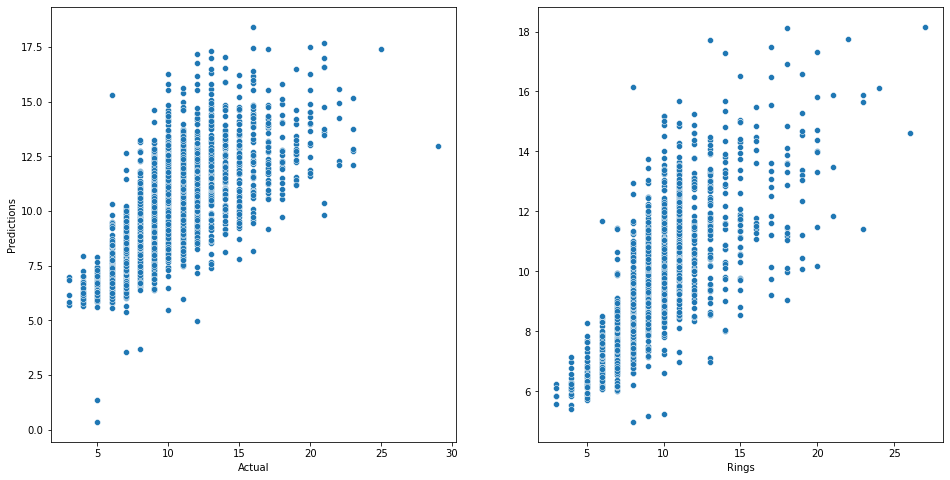

In [61]:
lr.fit(X_train, Y_train)
Y_train_pred_lr = lr.predict(X_train)
Y_test_pred_lr = lr.predict(X_test)

def get_metrics_pred(Y_train_pred, Y_test_pred):

    print("Training R2 Score: ", r2_score(Y_train, Y_train_pred))
    print("Training Mean Squared Error: ", mean_squared_error(Y_train, Y_train_pred))
    print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    print("Training Mean Absolute Error: ",mean_absolute_error(Y_train, Y_train_pred))
    print()

    print("Testing R2 Score:", r2_score(Y_test, Y_test_pred))
    print("Testing Mean Squared Error:", mean_squared_error(Y_test, Y_test_pred))
    print("Testing Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
    print("Testing Mean Absolute Error:", mean_absolute_error(Y_test, Y_test_pred))

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    sns.scatterplot(Y_train, Y_train_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predictions')
    plt.subplot(1,2,2)
    sns.scatterplot(Y_test, Y_test_pred)
    
get_metrics_pred(Y_train_pred_lr, Y_test_pred_lr)

<h4>Treating this as baselone Model, Lets tune the hyperparameters</h4>

In [118]:
lr = LinearRegression()
grid_param = {
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'positive':[True, False],
    'n_jobs':[-1]
}
grid = GridSearchCV(lr, param_grid=grid_param, cv=4, n_jobs=-1, scoring='r2')

grid.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False], 'n_jobs': [-1],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [119]:
grid.best_score_

0.5102929112368617

In [120]:
grid.best_params_

{'fit_intercept': True, 'n_jobs': -1, 'normalize': True, 'positive': False}

<h4>Building Model with best Parameters</h4>

Training R2 Score:  0.513464365474428
Training Mean Squared Error:  4.734126118960833
Training Root Mean Squared Error:  2.175804706071028
Training Mean Absolute Error:  1.5757250714609083

Testing R2 Score: 0.5148519451955857
Testing Mean Squared Error: 5.173175220493044
Testing Root Mean Squared Error: 2.2744615231946756
Testing Mean Absolute Error: 1.639708072035611


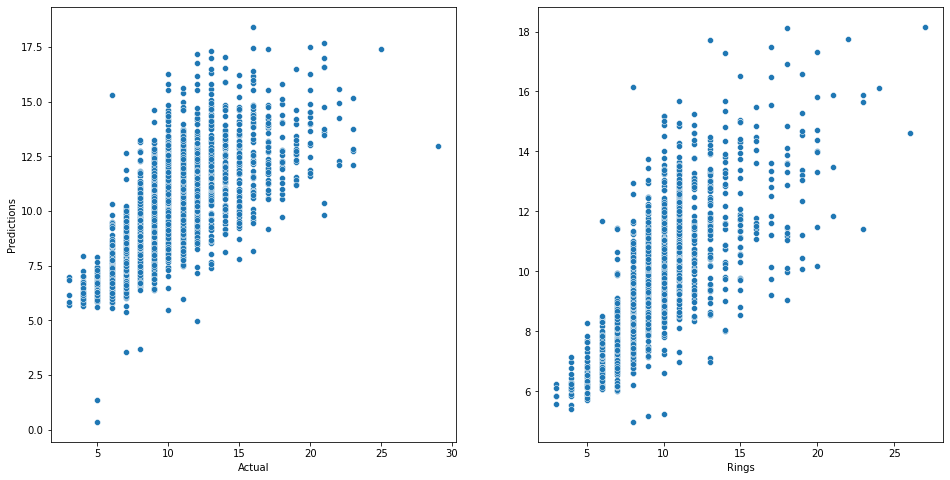

In [62]:
lrcv = LinearRegression(normalize=True)
lrcv.fit(X_train, Y_train)
Y_train_pred_lrcv = lrcv.predict(X_train)
Y_test_pred_lrcv = lrcv.predict(X_test)

get_metrics_pred(Y_train_pred_lrcv, Y_test_pred_lrcv)

<strong>Hyperparameter tuning in this model does not help much in improving model perofromance</strong>

<h3>Ridge Regression</h3>

In [63]:
from sklearn.linear_model import Ridge

Training R2 Score:  0.5134614523755052
Training Mean Squared Error:  4.734154464218033
Training Root Mean Squared Error:  2.175811219802406
Training Mean Absolute Error:  1.5755982753359614

Testing R2 Score: 0.5149368052541519
Testing Mean Squared Error: 5.1722703504274286
Testing Root Mean Squared Error: 2.274262594870572
Testing Mean Absolute Error: 1.6393212205926528


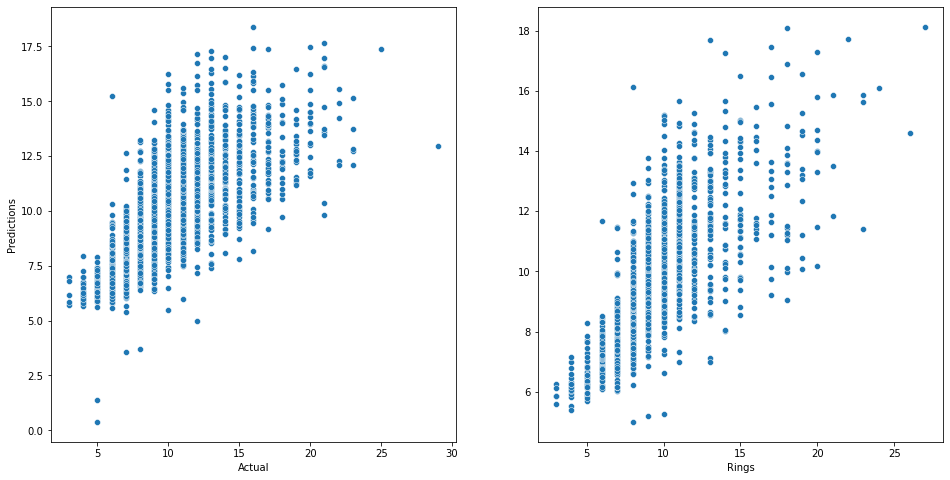

In [64]:
ridge = Ridge()
ridge.fit(X_train, Y_train)

Y_pred_train_rd = ridge.predict(X_train)
Y_pred_test_rd = ridge.predict(X_test)

get_metrics_pred(Y_pred_train_rd, Y_pred_test_rd)

<h4>Treating this as baseline Model, Lets tune the hyperparameters</h4>

In [66]:
ridge = Ridge()

grid_param = {
    'alpha':[1e-4, 1e-3, 1e-2, 0.1, 1, 10,100],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter':[None,50,100,500,1000,1500,2000,2500,3000]
}

grid = GridSearchCV(ridge, param_grid = grid_param, cv=4, n_jobs=-1, scoring='r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [None, 50, 100, 500, 1000, 1500, 2000,
                                      2500, 3000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='r2')

In [67]:
grid.best_score_

0.5121074454540244

In [68]:
grid.best_params_

{'alpha': 0.001, 'max_iter': 500, 'solver': 'saga'}

<h4>Building Model with best params</h4>

Training R2 Score:  0.5134643651804833
Training Mean Squared Error:  4.734126121820996
Training Root Mean Squared Error:  2.1758047067282935
Training Mean Absolute Error:  1.5757237117026863

Testing R2 Score: 0.5148528251183433
Testing Mean Squared Error: 5.173165837801389
Testing Root Mean Squared Error: 2.274459460575499
Testing Mean Absolute Error: 1.6397041302972846


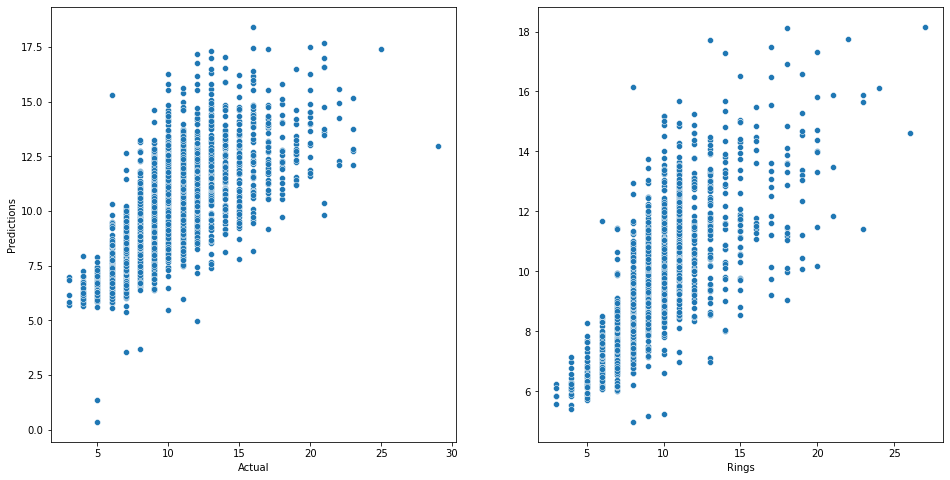

In [70]:
ridgecv = Ridge(alpha=.01, max_iter=2000,solver='auto')
ridgecv.fit(X_train, Y_train)

Y_train_pred_rdcv = ridgecv.predict(X_train)
Y_test_pred_rdcv = ridgecv.predict(X_test)

get_metrics_pred(Y_train_pred_rdcv, Y_test_pred_rdcv)

<strong>Hyperparameter Tuning is not having much effect in Ridge Regression</strong>

<h3>Lasso regression</h3>

Training R2 Score:  0.28158261314293587
Training Mean Squared Error:  6.990399621503691
Training Root Mean Squared Error:  2.6439363875675395
Training Mean Absolute Error:  1.924670664238142

Testing R2 Score: 0.2908791835475538
Testing Mean Squared Error: 7.561415942369379
Testing Root Mean Squared Error: 2.7498028915486614
Testing Mean Absolute Error: 1.9802345824323548


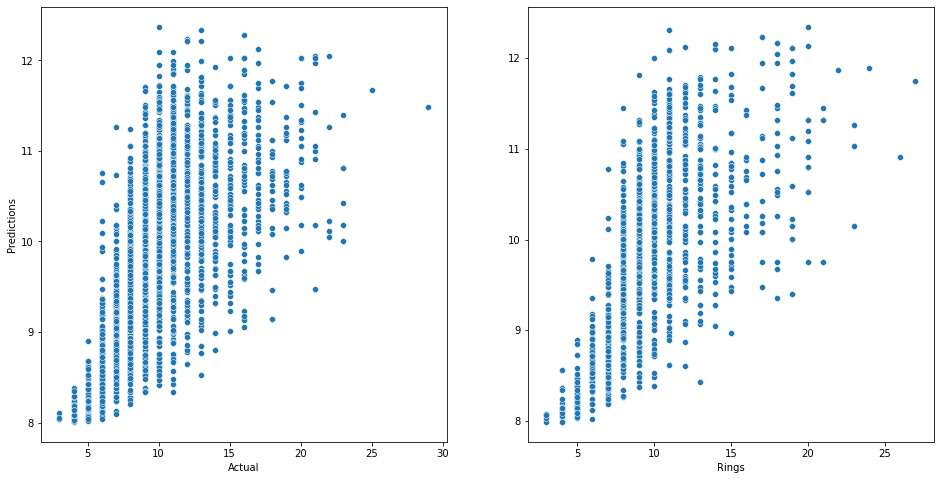

In [71]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, Y_train)

Y_pred_train_lasso = lasso.predict(X_train)
Y_pred_test_lasso = lasso.predict(X_test)

get_metrics_pred(Y_pred_train_lasso, Y_pred_test_lasso)


<h4>Hyperparameter Tuning on Lasso</h4>

In [73]:
lasso = Lasso()

grid_param = {
    'alpha':[1e-4, 1e-3, 1e-2, 0.1, 1, 10,100],
    'max_iter':[None,50,100,500,1000,1500,2000,2500,3000]
}

grid = GridSearchCV(lasso, param_grid= grid_param, n_jobs=-1, cv=5, scoring='r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [None, 50, 100, 500, 1000, 1500, 2000,
                                      2500, 3000]},
             scoring='r2')

In [74]:
grid.best_score_

0.5108547140006993

In [75]:
grid.best_params_

{'alpha': 0.001, 'max_iter': 500}

<h4>Building Model with best parameters</h4>

Training R2 Score:  0.5134597667985049
Training Mean Squared Error:  4.734170865347851
Training Root Mean Squared Error:  2.1758149887680824
Training Mean Absolute Error:  1.5756143721655411

Testing R2 Score: 0.5150554771174987
Testing Mean Squared Error: 5.171004942194302
Testing Root Mean Squared Error: 2.273984375978494
Testing Mean Absolute Error: 1.6392763342198426


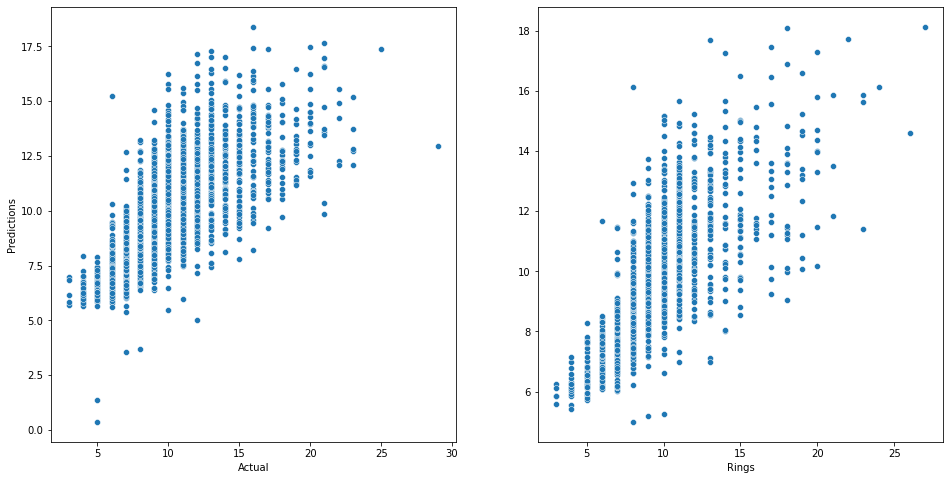

In [76]:
lassocv = Lasso(alpha=0.001, max_iter=100)
lassocv.fit(X_train, Y_train)

Y_pred_train_lascv = lassocv.predict(X_train)
Y_pred_test_lascv = lassocv.predict(X_test)

get_metrics_pred(Y_pred_train_lascv, Y_pred_test_lascv)


<strong>This model performs slightly better than Linear Regression and Ridge Regression</strong>

<h3>KNeighborsRegressor</h3>

In [77]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

Training R2 Score:  0.6311499065684336
Training Mean Squared Error:  3.5890132960111973
Training Root Mean Squared Error:  1.8944691330320473
Training Mean Absolute Error:  1.3394681595521343

Testing R2 Score: 0.47248297106684867
Testing Mean Squared Error: 5.624959216965742
Testing Root Mean Squared Error: 2.371699647292157
Testing Mean Absolute Error: 1.639641109298532


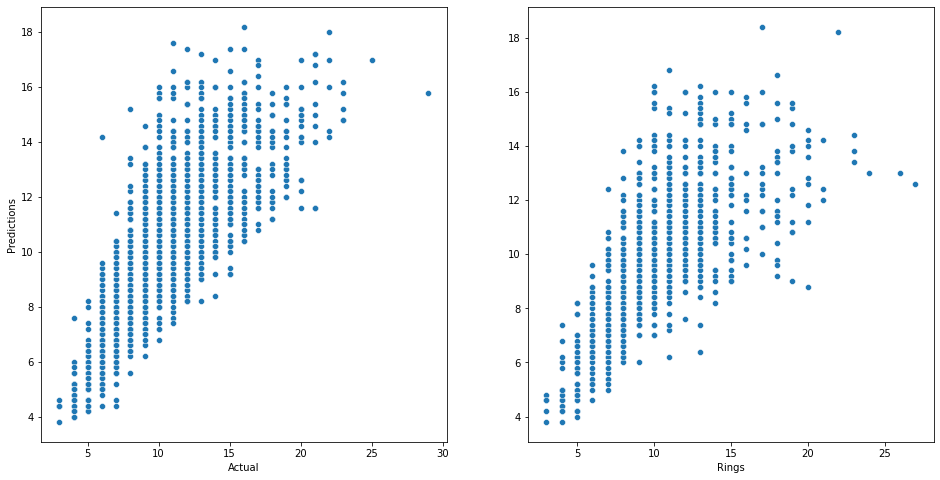

In [78]:
Y_pred_train_knn = knn.predict(X_train)
Y_pred_test_knn = knn.predict(X_test)

get_metrics_pred(Y_pred_train_knn, Y_pred_test_knn)

<h4>Hyperparameter Tuning</h4>

In [165]:
knn = KNeighborsRegressor()

grid_param = {
    'n_neighbors':[13,15,17,19,21,23,25,27,29],
    'weights':['uniform', 'distance'],
    'leaf_size':[5,10,15,20,25,30,35],
    'p':[1,2]
}

grid = GridSearchCV(knn, param_grid = grid_param, n_jobs=-1, scoring='r2', cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [5, 10, 15, 20, 25, 30, 35],
                         'n_neighbors': [13, 15, 17, 19, 21, 23, 25, 27, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='r2')

In [166]:
grid.best_params_

{'leaf_size': 5, 'n_neighbors': 21, 'p': 2, 'weights': 'distance'}

In [167]:
grid.best_score_

0.49892823304020073

<h4>Building Model with best Params</h4>

Training R2 Score:  1.0
Training Mean Squared Error:  0.0
Training Root Mean Squared Error:  0.0
Training Mean Absolute Error:  0.0

Testing R2 Score: 0.5110622572846093
Testing Mean Squared Error: 5.2135849869557145
Testing Root Mean Squared Error: 2.283327612708197
Testing Mean Absolute Error: 1.5723209025102824


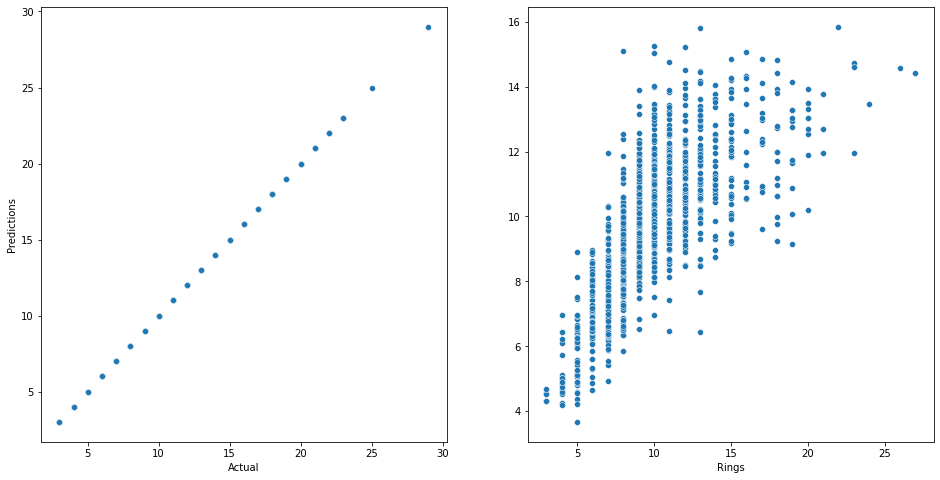

In [79]:
knncv = KNeighborsRegressor(n_neighbors=21, weights='distance', p=2, leaf_size=5)

knncv.fit(X_train, Y_train)

Y_pred_train_knncv=knncv.predict(X_train)
Y_pred_test_knncv = knncv.predict(X_test)

get_metrics_pred(Y_pred_train_knncv, Y_pred_test_knncv)

<strong>This model is overfititng on training data, but giving better performmance than other model on testing data</strong>

<h3>Decision Tree Regressor</h3>

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, Y_train)

DecisionTreeRegressor()

Training R2 Score:  1.0
Training Mean Squared Error:  0.0
Training Root Mean Squared Error:  0.0
Training Mean Absolute Error:  0.0

Testing R2 Score: 0.09385361144657767
Testing Mean Squared Error: 9.66231647634584
Testing Root Mean Squared Error: 3.1084266882694593
Testing Mean Absolute Error: 2.1517128874388254


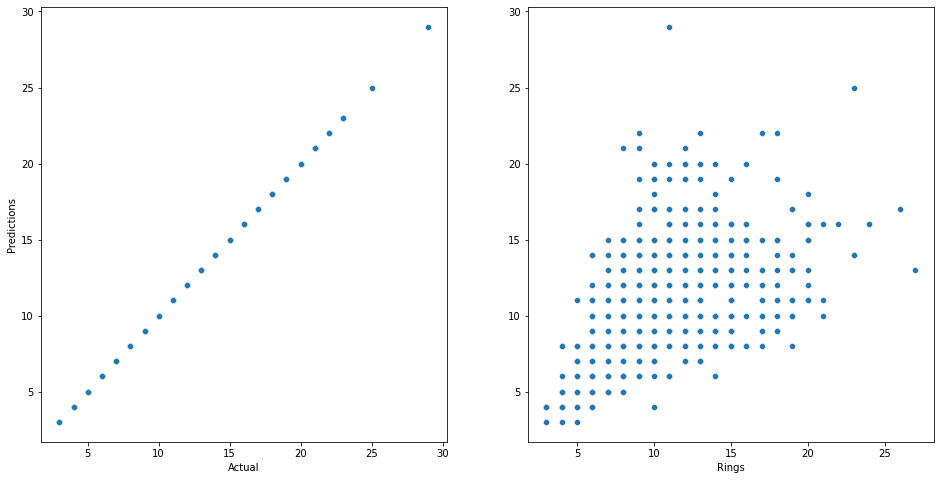

In [81]:
Y_pred_train_dt = dt.predict(X_train)
Y_pred_test_dt = dt.predict(X_test)

get_metrics_pred(Y_pred_train_dt, Y_pred_test_dt)

<strong>Overfitting On training Data</strong>

<h4>Hyperparameter Tuning</h4>

In [193]:
dt = DecisionTreeRegressor()

grid_param = {
    'criterion':["mse", "friedman_mse", "mae", "poisson"],
    'max_depth':[5,6,7,8,9,10,11,12,13],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[2,3,4,5,6],
    'max_leaf_nodes':[21,24,27,30]
}

grid = GridSearchCV(dt, param_grid=grid_param, cv=5, n_jobs=-1, scoring='r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'max_leaf_nodes': [21, 24, 27, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='r2')

In [194]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [195]:
grid.best_score_

0.4618072163750071

<h4>Building Model with Best Params</h4>

Training R2 Score:  0.5533608783276613
Training Mean Squared Error:  4.345922028343455
Training Root Mean Squared Error:  2.084687513356248
Training Mean Absolute Error:  1.4675491092863198

Testing R2 Score: 0.49823277428767965
Testing Mean Squared Error: 5.350386861917802
Testing Root Mean Squared Error: 2.3130903272284464
Testing Mean Absolute Error: 1.6211899619073784


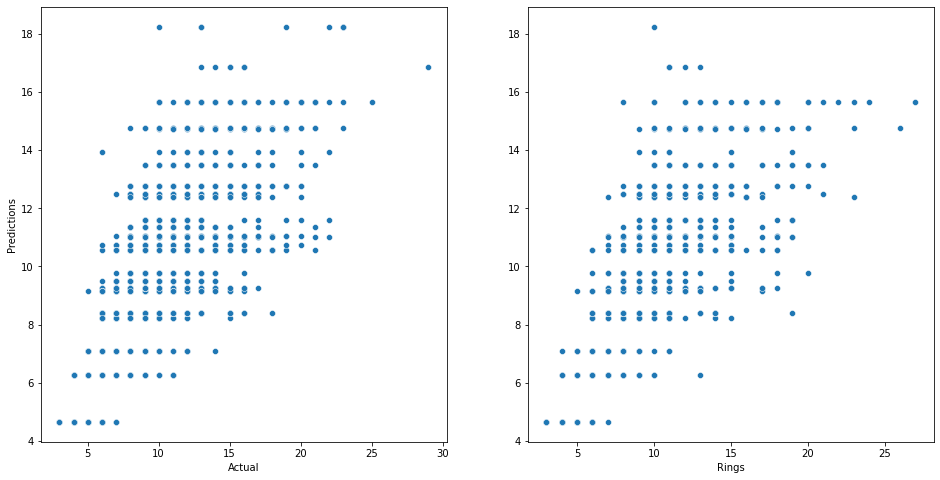

In [82]:
dtcv = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=27, min_samples_leaf=6, min_samples_split=2)

dtcv.fit(X_train, Y_train)

Y_pred_train_dtcv = dtcv.predict(X_train)
Y_pred_test_dtcv = dtcv.predict(X_test)

get_metrics_pred(Y_pred_train_dtcv, Y_pred_test_dtcv)

<strong>Lasso was performing better than Decision Tree</strong>

<h3>Random Forest Regressor</h3>

Training R2 Score:  0.9298931991840006
Training Mean Squared Error:  0.6821585374387683
Training Root Mean Squared Error:  0.825928893694105
Training Mean Absolute Error:  0.5791287613715885

Testing R2 Score: 0.5088741955602608
Testing Mean Squared Error: 5.23691647634584
Testing Root Mean Squared Error: 2.2884310075564525
Testing Mean Absolute Error: 1.6231321370309952


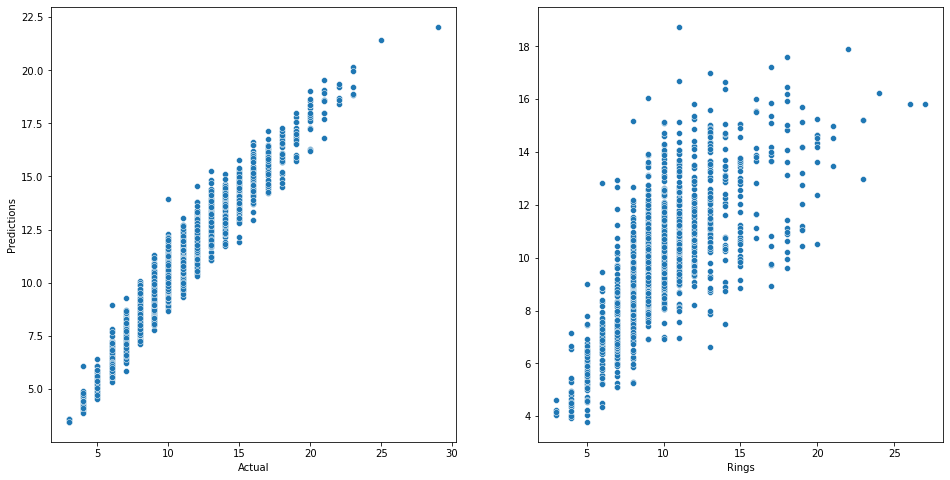

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, Y_train)

Y_pred_train_rf = rf.predict(X_train)
Y_pred_test_rf = rf.predict(X_test)

get_metrics_pred(Y_pred_train_rf, Y_pred_test_rf)

<h4>Hyperparameter Tuning</h4>

In [200]:
rf = RandomForestRegressor()

grid_param = {
    'n_estimators':[90,100,110,120, 130],
    'criterion':["mse", "friedman_mse", "mae", "poisson"],
    'max_depth':[4,5,6,7,],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,5,6],
    'max_leaf_nodes':[21,24,27,30],
    'n_jobs':[-1]
}
grid = GridSearchCV(rf, param_grid=grid_param, cv=5, n_jobs=-1, scoring='r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [21, 24, 27, 30],
                         'min_samples_leaf': [3, 5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [90, 100, 110, 120, 130],
                         'n_jobs': [-1]},
             scoring='r2')

In [201]:
grid.best_score_

0.5191236450894574

In [202]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 120,
 'n_jobs': -1}

<h4>Building Model with Best Parameters</h4>

Training R2 Score:  0.5983368426756077
Training Mean Squared Error:  3.9082934715930597
Training Root Mean Squared Error:  1.9769404319789354
Training Mean Absolute Error:  1.396532837335864

Testing R2 Score: 0.5351317128288031
Testing Mean Squared Error: 4.956930322964163
Testing Root Mean Squared Error: 2.2264164756316736
Testing Mean Absolute Error: 1.550358186919019


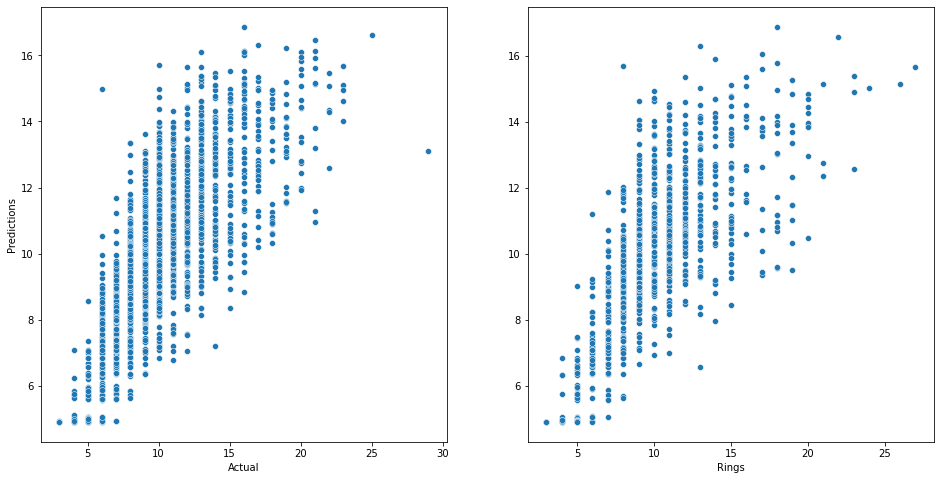

In [85]:
rfcv = RandomForestRegressor(n_estimators=120, max_depth=6, max_leaf_nodes=30, min_samples_leaf=6, min_samples_split=6, n_jobs=-1)
rfcv.fit(X_train, Y_train)

Y_pred_train_rfcv = rfcv.predict(X_train)
Y_pred_test_rfcv = rfcv.predict(X_test)

get_metrics_pred(Y_pred_train_rfcv, Y_pred_test_rfcv)


<strong>This Model is the best performing, and it also does not overfit</strong>

<h3>SVMRegressor</h3>

In [92]:
from sklearn.svm import SVR

Training R2 Score:  0.5388023842369309
Training Mean Squared Error:  4.487580197317801
Training Root Mean Squared Error:  2.1183909453445557
Training Mean Absolute Error:  1.4267427886020494

Testing R2 Score: 0.5165820532844428
Testing Mean Squared Error: 5.154726929903363
Testing Root Mean Squared Error: 2.270402371806232
Testing Mean Absolute Error: 1.5403005634181646


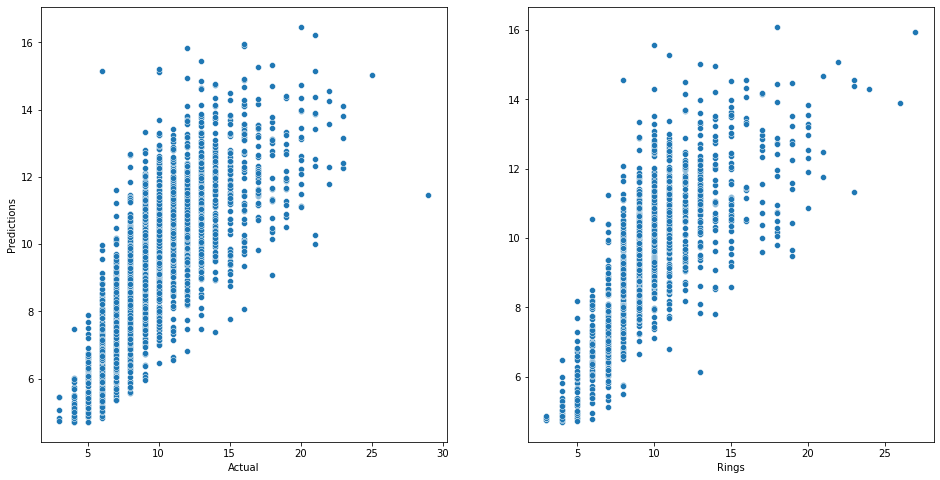

In [94]:
svr  = SVR()

svr.fit(X_train, Y_train)

Y_pred_train_svm = svr.predict(X_train)
Y_pred_test_svm = svr.predict(X_test)

get_metrics_pred(Y_pred_train_svm, Y_pred_test_svm)

<h4>Hyperparameter Tuning</h4>

In [96]:
svr = SVR()

grid_param = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[2,3,4,5],
    'max_iter':[-1],
    'epsilon':[0.01, 0.1, 0.5, 1],
    'C':[0.1, 1.0,5.0, 10.0]
}

grid = GridSearchCV(svr, param_grid = grid_param, cv=5, n_jobs=-1, scoring='r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 5.0, 10.0], 'degree': [2, 3, 4, 5],
                         'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1]},
             scoring='r2')

In [97]:
grid.best_score_

0.5394833908086987

In [98]:
grid.best_params_

{'C': 5.0, 'degree': 2, 'epsilon': 1, 'kernel': 'rbf', 'max_iter': -1}

<h4>Building Model with best params</h4>

Training R2 Score:  0.5629288259792515
Training Mean Squared Error:  4.252823254753292
Training Root Mean Squared Error:  2.0622374389854556
Training Mean Absolute Error:  1.4757716685109994

Testing R2 Score: 0.5341621953690027
Testing Mean Squared Error: 4.967268370595615
Testing Root Mean Squared Error: 2.228736945131842
Testing Mean Absolute Error: 1.5810072898829266


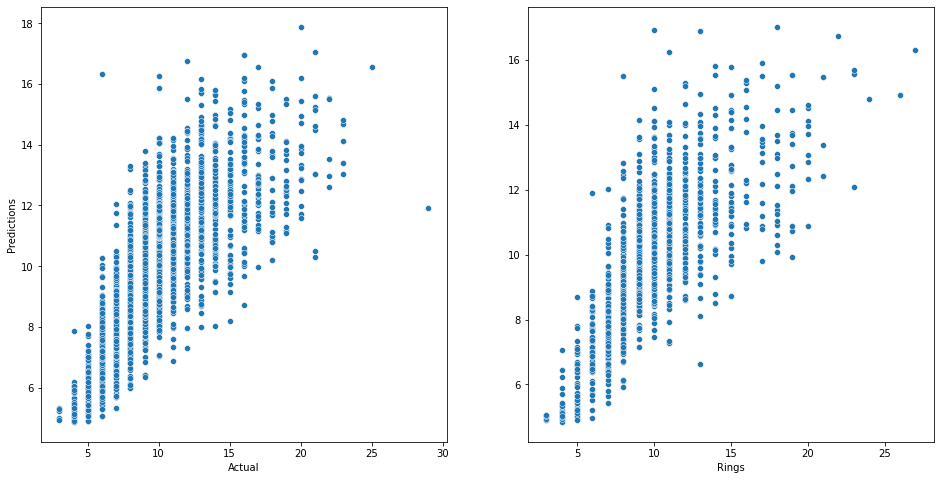

In [110]:
svrcv = SVR(degree=2,kernel='rbf', epsilon=2, max_iter=-1, C=5)

svrcv.fit(X_train, Y_train)

Y_pred_train_svrcv = svrcv.predict(X_train)
Y_pred_test_svrcv = svrcv.predict(X_test)

get_metrics_pred(Y_pred_train_svrcv, Y_pred_test_svrcv)

<strong>Random Forest Regressor was the best performing model, so choosing this model to save finally</strong>

Training R2 Score:  0.5990346008490328
Training Mean Squared Error:  3.9015040918249135
Training Root Mean Squared Error:  1.9752225423543832
Training Mean Absolute Error:  1.3968668946771268

Testing R2 Score: 0.5347207021927836
Testing Mean Squared Error: 4.96131296454452
Testing Root Mean Squared Error: 2.2274004948694164
Testing Mean Absolute Error: 1.5504435130360852


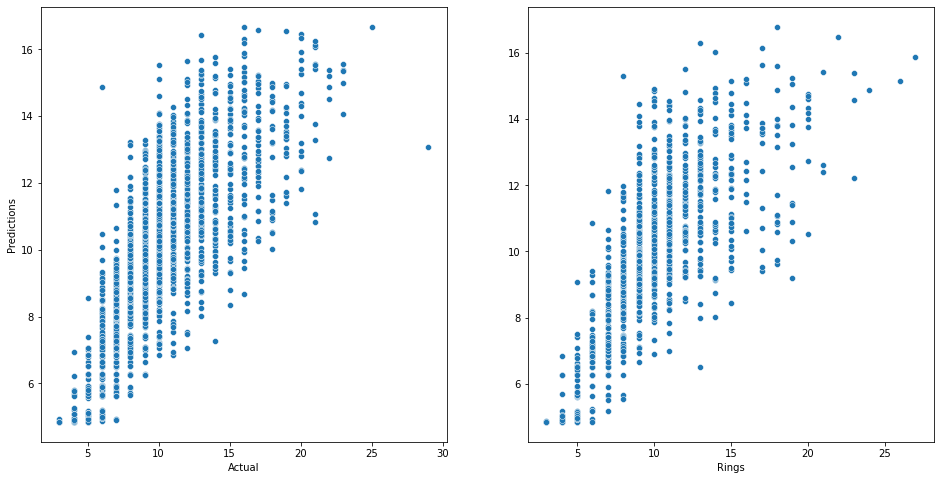

In [112]:
final_model = RandomForestRegressor(n_estimators=120, max_depth=6, max_leaf_nodes=30, min_samples_leaf=6, min_samples_split=6, n_jobs=-1)
final_model.fit(X_train, Y_train)

Y_pred_train_final_model = final_model.predict(X_train)
Y_pred_test_final_model = final_model.predict(X_test)

get_metrics_pred(Y_pred_train_final_model, Y_pred_test_final_model)

<h3>Saving Model</h3>

In [ ]:
import pickle

filepath = 'final_model.pickle'
pickle.dump()